# OBJECTIF

L'objectif de ce TP est de montrer que, pour différentes lois de probabilité et différentes méthodes déscente de gradient, l'espérance d'un vecteur aléaroire se dévoile comme la solution d'un problème d'optimisation, et à comparer empiriquement les convergences de nos modèles. 

# DEMONSTRATION

Soit $X=(X_1,\dots,X_d)$ un vecteur aléatoire à valeurs dans $\mathbb{R}^d$.
On considère la fonction objectif
$$
f(x_1,\dots,x_d)
= \mathbb{E}\big[(X_1-x_1)^2+\cdots+(X_d-x_d)^2\big].
$$

Pour une réalisation de $X$, un gradient bruité de $f$ en $(x_1,\dots,x_d)$ est donné par :
$$
\big(-2(X_1-x_1),\dots,-2(X_d-x_d)\big).
$$

On a donc, en prenant l'espérance :
$$
\nabla f(x_1,\dots,x_d)
= \mathbb{E}\big[(-2(X_1-x_1),\dots,-2(X_d-x_d))\big].
$$
D'où
$$
\nabla f(x_1,\dots,x_d)
= -2\big(\mathbb{E}[X_1]-x_1,\dots,\mathbb{E}[X_d]-x_d\big).
$$

En posant $x\in\mathbb{R}^d$ avec $x=(x_1,\dots,x_d)$, on peut écrire :
$$
\nabla f(x)=2\big(x-\mathbb{E}[X]\big).
$$

Pour trouver un minimum de $f$, on résout :
$$
\nabla f(x)=0
\quad \Longleftrightarrow \quad
2\big(x-\mathbb{E}[X]\big)=0
\quad \Longleftrightarrow \quad
x=\mathbb{E}[X].
$$
Ainsi, $\mathbb{E}[X]$ est un point critique de $f$.

De plus, la Hessienne de $f$ vaut :
$$
\nabla^2 f(x)=2I_d,
$$
où $I_d$ est la matrice identité en dimension $d$.
Comme $2I_d$ est définie positive, $f$ est strictement convexe sur $\mathbb{R}^d$.
Le point critique est donc un minimum global unique.

Finalement, le minimiseur de
$$
f(x)=\mathbb{E}\big[(X_1-x_1)^2+\cdots+(X_d-x_d)^2\big]
$$
est exactement
$$
\boxed{x^\star=\mathbb{E}[X]}.
$$


### *Représentation du gradiant de la fonction pour analyser les conditions de Robbins-Monro* 

- Dans le contexte d'une loi normale homoscélastique et en dimension 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(123456)


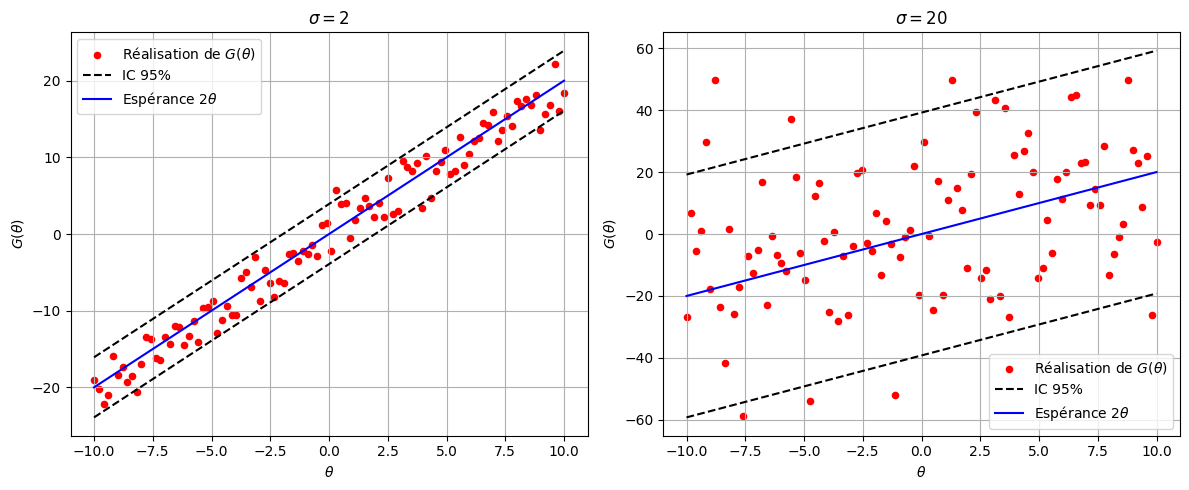

In [3]:
def G(theta, sigma):
    return 2 * theta + np.random.normal(0, sigma)

Theta = np.linspace(-10, 10, 100)

sigmas = [2, 20]  # sigma petit et sigma grand
titles = [r'$\sigma = 2$', r'$\sigma = 20$']

plt.figure(figsize=(12, 5))

for i, sigma in enumerate(sigmas):
    Y = np.array([G(t, sigma) for t in Theta])

    borne_inf = 2 * Theta - 1.96 * sigma
    borne_sup = 2 * Theta + 1.96 * sigma

    plt.subplot(1, 2, i + 1)

    plt.scatter(Theta, Y, color='red', s=20, label='Réalisation de $G(\\theta)$')
    plt.plot(Theta, borne_inf, 'k--', label='IC 95%')
    plt.plot(Theta, borne_sup, 'k--')
    plt.plot(Theta, 2 * Theta, color='blue', label='Espérance $2\\theta$')

    plt.title(titles[i])
    plt.xlabel(r'$\theta$')
    plt.ylabel(r'$G(\theta)$')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


Pour coller aux conditions de Gibbs-Monro, il faut bounded mean and variance. pour la mean c'est ok même si la fonction n'est pas borné on va se mettre dans un espace de recherche borné. 2ème condition on est bien dans le cas :  g(.) below then above threshold 0. g(.) strictly increasing near θ⋆ = E[X]. et ici  |g(θ)−α| not too small far from θ⋆ est très bien respecté.

Sur les 2 graphes représenté ont voit que plus sigma augmente plus la recherche devient compliqué et on pourrait avoir du ping pong. 
Avant de tester différents algorithmes

Donner les candidats les meilleures en fonction de la loi



La comparaison de la performance se fait avec la moyenne empirique de votre échantillon par rapport à la solution trouvé. peut on pensé à d'autres estimteurs de la moyenne ? 

# Algorithme testé

On va testé 3 algorithmes :
- Robins-Monro
- ADAM
- ADAGRAD

Sur différentes lois de probabilités.

## Gradient bruité et Robbins–Monro

On a programmé la fonction $G$ et on s’apprête à programmer l’algorithme de Robbins–Monro :
$$
\Theta_{n+1} = \Theta_n - a_n\, G(\Theta_n).
$$
On prendra des pas de la forme
$$
a_n = \frac{a}{n^\alpha},
$$
où $a > 0$ et $\alpha \in (0,1]$ sont des paramètres de l’algorithme.

---

## AdaGrad

L’algorithme **AdaGrad** adapte le pas de descente en fonction de l’historique des gradients observés.  
On introduit la suite
$$
S_n = \sum_{k=1}^n G(\Theta_k)^2.
$$
La mise à jour de $\Theta_n$ est donnée par
$$
\Theta_{n+1}
= \Theta_n
- \frac{a}{\sqrt{S_n} + \varepsilon}\, G(\Theta_n),
$$
où $a > 0$ est le pas initial et $\varepsilon > 0$ est un paramètre de stabilisation numérique.

---

## Adam

L’algorithme **Adam** combine une moyenne exponentielle des gradients (moment d’ordre 1) et une moyenne exponentielle des gradients au carré (moment d’ordre 2).

On définit les suites :
$$
\begin{aligned}
m_n &= \beta_1 m_{n-1} + (1-\beta_1)\, G(\Theta_n), \\
v_n &= \beta_2 v_{n-1} + (1-\beta_2)\, G(\Theta_n)^2,
\end{aligned}
$$
avec $m_0 = 0$, $v_0 = 0$ et $\beta_1, \beta_2 \in (0,1)$.

Les versions corrigées du biais sont données par :
$$
\begin{aligned}
\hat m_n &= \frac{m_n}{1-\beta_1^n}, \\
\hat v_n &= \frac{v_n}{1-\beta_2^n}.
\end{aligned}
$$

La mise à jour de $\Theta_n$ est alors :
$$
\Theta_{n+1}
= \Theta_n
- a\, \frac{\hat m_n}{\sqrt{\hat v_n} + \varepsilon},
$$
où $a > 0$ est le pas d’apprentissage et $\varepsilon > 0$ un terme de régularisation numérique.


# Loi normal

On prend X un vecteur gaussien de dimension d

In [4]:
d = 10
sigma = np.linspace(1, 10, d)
mu = np.linspace(-5, 5, d)

def G(theta, mu, sigma, df):
    """Génère le gradient stochastique vectoriel"""
    epsilon = np.random.normal(loc=mu, scale=sigma, size=d)
    return 2 * (theta - epsilon)


On prend $\theta_{init}$ dans [-10 , 10]^d 
les $\mu_{i}$ sont dans [-5, 5] avec les $\sigma_{i}$ dans [1, 5] 

On fixe N = 100 le nombre d'itération de l'algorithme de Robins-Monro et à 50 le nombre d'observations du vecteur aléatoire X. 


Dans un premier temps on teste Robins-Monro avec des variables aléatoires i.i.d de variance croissante tel que (i < j) |-> $\sigma_{i}$ < $\sigma_{j}$ pour voir si l'algorithme a plus de mal avec les lois qui ont une plus forte variance


In [5]:

def RobbinsMonro(thetainit, a, alpha, mu, sigma, df, G = G, nmax=100):
    """Algorithme de Robbins-Monro pour vecteurs en dimension d"""
    Theta = np.zeros((nmax, d))  # matrice nmplt x d
    Theta[0] = thetainit
    for n in range(nmax - 1):
        Theta[n + 1] = Theta[n] - a / (n + 1)**alpha * G(Theta[n], mu, sigma, df)
    
    return Theta

def SeveralRobbinsMonro(thetainit, a, alpha, mu, sigma, df, G = G, nmax=50, nsimu=100):
    """ 
    Répète l'algorithme nsimu fois et collecte les valeurs finales.
    Retourne une matrice (nsimu, d) des positions finales.
    """
    Result = np.zeros((nsimu, d))
    for i in range(nsimu):
        Theta = RobbinsMonro(thetainit, a, alpha, mu, sigma, df, G, nmax)
        Result[i] = Theta[-1] 
    return Result

def RobbinsMonroForVaryingStepSize(thetainit, Steps, alpha, mu, sigma, df, G = G, nmax=50, nsimu=100):
    """
    Analyse le compromis biais-variance pour différentes valeurs du pas.
    
    Returns:
        Bias_squared: Biais au carré moyen sur toutes les composantes
        Variance: Variance moyenne sur toutes les composantes
        MSE: Mean Squared Error (Bias² + Variance)
    """
    nbSteps = len(Steps)
    Bias_squared = np.zeros(nbSteps)
    Variance = np.zeros(nbSteps)
    
    for i in range(nbSteps):
        Results = SeveralRobbinsMonro(thetainit, Steps[i], alpha, mu, sigma, df, G, nmax, nsimu)
        
        empirical_mean = np.mean(Results, axis=0) 
        
        bias_vector = empirical_mean - mu
        Bias_squared[i] = np.mean(bias_vector ** 2)  
        
        Variance[i] = np.mean(np.var(Results, axis=0))
    
    MSE = Bias_squared + Variance
    return Bias_squared, Variance, MSE


def RobbinsMonroForVarying_alphas(thetainit, step, alphas, mu, sigma, df, G = G, nmax=50, nsimu=100):
    """
    Analyse le compromis biais-variance pour différentes valeurs de alpha.

    """
    nbSteps = len(alphas)
    Bias_squared = np.zeros(nbSteps)
    Variance = np.zeros(nbSteps)
    
    for i in range(nbSteps):
        Results = SeveralRobbinsMonro(thetainit, step, alphas[i], mu, sigma, df, G, nmax, nsimu)
        
        empirical_mean = np.mean(Results, axis=0) 
        
        bias_vector = empirical_mean - mu
        Bias_squared[i] = np.mean(bias_vector ** 2)  
        
        Variance[i] = np.mean(np.var(Results, axis=0))
    
    MSE = Bias_squared + Variance
    return Bias_squared, Variance, MSE

Comme le pas des algos d'Adagrad et d'Adam diminuent au cours des itérations. On doit utiliser plus d'itérations pour observer leur convergence. On fixe N=1000 pour Adagrad et 70 000 pour Adam.

In [6]:
def AdaGrad(thetainit, a, alpha, mu, sigma, df, G=G, nmax=1000, eps=1e-8):
    """AdaGrad (même interface que RobbinsMonro, avec df)"""
    d = len(mu)
    Theta = np.zeros((nmax, d))
    Theta[0] = thetainit

    s = np.zeros(d)  # accumulateur des carrés de gradients

    for n in range(nmax - 1):
        g = G(Theta[n], mu, sigma, df)           # gradient bruité
        s += g * g                               # somme des g^2
        step = a / (n + 1)**alpha                # pas de base (comme RM)
        Theta[n + 1] = Theta[n] - step * g / (np.sqrt(s) + eps)

    return Theta


def Adam(thetainit, a, alpha, mu, sigma, df, G=G, nmax=1000,
         beta1=0.9, beta2=0.999, eps=1e-8):
    """Adam (même interface que RobbinsMonro, avec df)"""
    d = len(mu)
    Theta = np.zeros((nmax, d))
    Theta[0] = thetainit

    m = np.zeros(d)  # 1er moment
    v = np.zeros(d)  # 2e moment

    for n in range(nmax - 1):
        t = n + 1
        g = G(Theta[n], mu, sigma, df)

        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * (g * g)

        # corrections de biais
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)

        step = a / (t**alpha)
        Theta[n + 1] = Theta[n] - step * m_hat / (np.sqrt(v_hat) + eps)

    return Theta


def SeveralAdaGrad(thetainit, a, alpha, mu, sigma, df, G=G, nmax=50, nsimu=100):
    """Répète AdaGrad nsimu fois et garde Theta[-1]"""
    d = len(mu)
    Result = np.zeros((nsimu, d))
    for i in range(nsimu):
        Theta = AdaGrad(thetainit, a, alpha, mu, sigma, df, G, nmax)
        Result[i] = Theta[-1]
    return Result


def AdaGradForVaryingStepSize(thetainit, Steps, alpha, mu, sigma, df, G=G, nmax=50, nsimu=100):
    """Biais² / Variance / MSE pour différents pas (a dans RM)"""
    nbSteps = len(Steps)
    Bias_squared = np.zeros(nbSteps)
    Variance = np.zeros(nbSteps)

    for i in range(nbSteps):
        Results = SeveralAdaGrad(thetainit, Steps[i], alpha, mu, sigma, df, G, nmax, nsimu)

        empirical_mean = np.mean(Results, axis=0)
        bias_vector = empirical_mean - mu
        Bias_squared[i] = np.mean(bias_vector ** 2)

        Variance[i] = np.mean(np.var(Results, axis=0))

    MSE = Bias_squared + Variance
    return Bias_squared, Variance, MSE


def SeveralAdam(thetainit, a, alpha, mu, sigma, df, G=G, nmax=50, nsimu=100,
                beta1=0.9, beta2=0.999):
    """Répète Adam nsimu fois et garde Theta[-1]"""
    d = len(mu)
    Result = np.zeros((nsimu, d))
    for i in range(nsimu):
        Theta = Adam(thetainit, a, alpha, mu, sigma, df, G,
                     nmax, beta1=beta1, beta2=beta2)
        Result[i] = Theta[-1]
    return Result


def AdamForVarying_beta1(thetainit, beta1s, a, alpha, mu, sigma, df, G=G,
                         nmax=50, nsimu=100, beta2=0.999):
    """Biais² / Variance / MSE pour différentes valeurs de beta1 (beta2 fixé)"""
    nb = len(beta1s)
    Bias_squared = np.zeros(nb)
    Variance = np.zeros(nb)

    for i in range(nb):
        Results = SeveralAdam(thetainit, a, alpha, mu, sigma, df, G,
                              nmax, nsimu, beta1=beta1s[i], beta2=beta2)

        empirical_mean = np.mean(Results, axis=0)
        bias_vector = empirical_mean - mu
        Bias_squared[i] = np.mean(bias_vector ** 2)
        Variance[i] = np.mean(np.var(Results, axis=0))

    MSE = Bias_squared + Variance
    return Bias_squared, Variance, MSE


def AdamForVarying_beta2(thetainit, beta2s, a, alpha, mu, sigma, df, G=G,
                         nmax=50, nsimu=100, beta1=0.9):
    """Biais² / Variance / MSE pour différentes valeurs de beta2 (beta1 fixé)"""
    nb = len(beta2s)
    Bias_squared = np.zeros(nb)
    Variance = np.zeros(nb)

    for i in range(nb):
        Results = SeveralAdam(thetainit, a, alpha, mu, sigma, df, G,
                              nmax, nsimu, beta1=beta1, beta2=beta2s[i])

        empirical_mean = np.mean(Results, axis=0)
        bias_vector = empirical_mean - mu
        Bias_squared[i] = np.mean(bias_vector ** 2)
        Variance[i] = np.mean(np.var(Results, axis=0))

    MSE = Bias_squared + Variance
    return Bias_squared, Variance, MSE



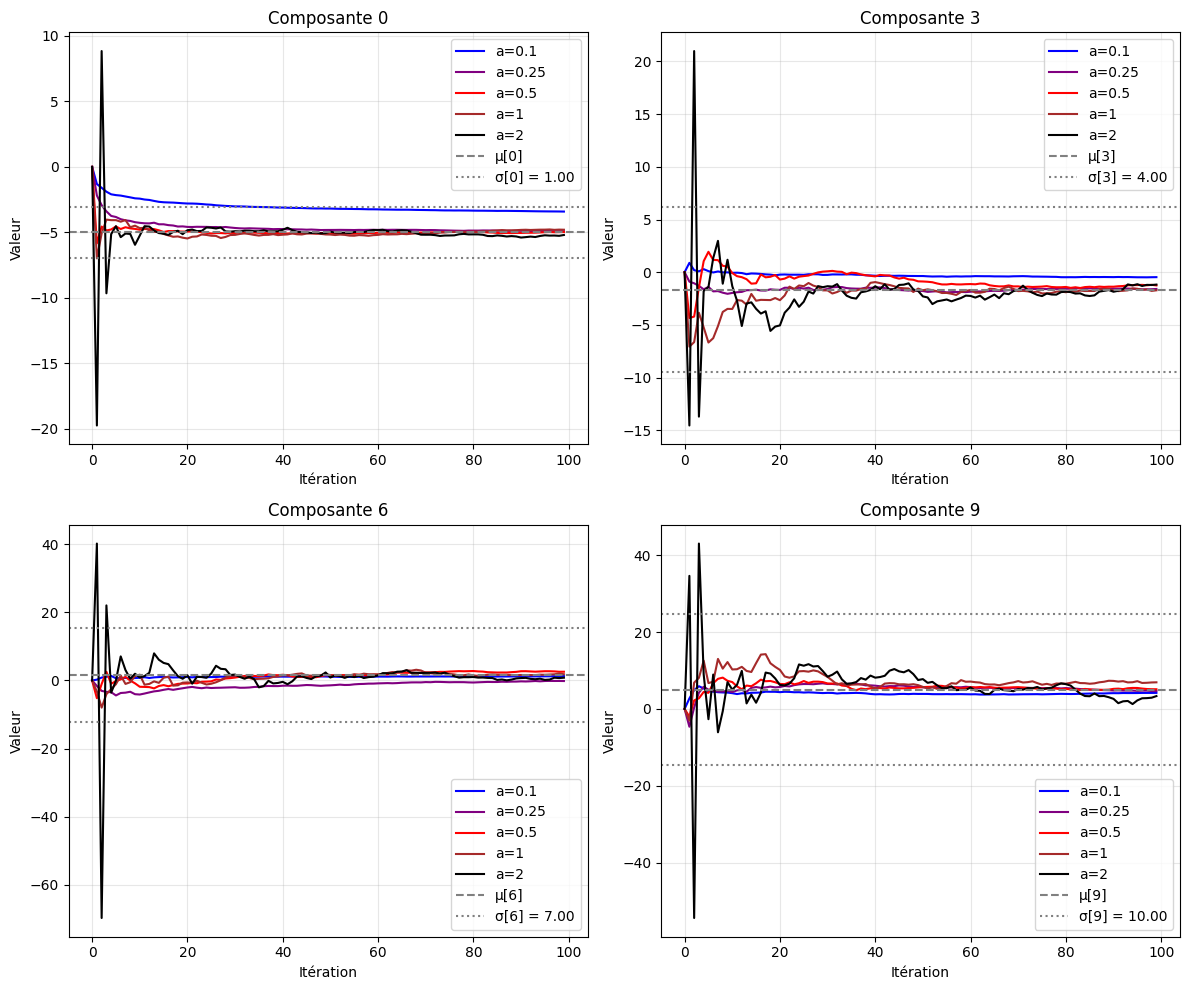

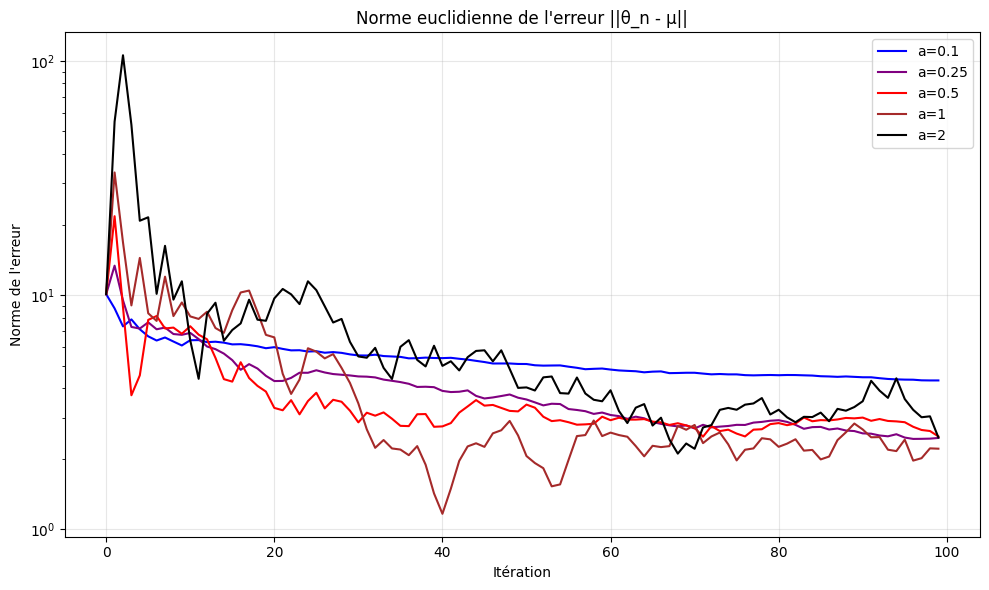

Erreur finale (norme) pour chaque valeur de a:
a=0.1  : 4.3236
a=0.25 : 2.4568
a=0.5  : 2.4943
a=1    : 2.2108
a=2    : 2.4684


In [7]:

thetainit = np.zeros(d) # pour la reproductibilité

Theta1 = RobbinsMonro(thetainit, 0.1, alpha=1, mu=mu, sigma=sigma, df=None)
Theta2 = RobbinsMonro(thetainit, 0.25, alpha=1, mu=mu, sigma=sigma, df=None)
Theta3 = RobbinsMonro(thetainit, 0.5, alpha=1, mu=mu, sigma=sigma, df=None)
Theta4 = RobbinsMonro(thetainit, 1, alpha=1, mu=mu, sigma=sigma, df=None)
Theta5 = RobbinsMonro(thetainit, 2, alpha=1, mu=mu, sigma=sigma, df=None)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
components_to_plot = [0, 3, 6, 9]  

for idx, comp in enumerate(components_to_plot):
    ax = axes[idx // 2, idx % 2]
    
    ax.plot(Theta1[:, comp], color='blue', label='a=0.1')
    ax.plot(Theta2[:, comp], color='purple', label='a=0.25')
    ax.plot(Theta3[:, comp], color='red', label='a=0.5')
    ax.plot(Theta4[:, comp], color='brown', label='a=1')
    ax.plot(Theta5[:, comp], color='black', label='a=2')
    ax.axhline(mu[comp], color='gray', linestyle='--', label=f'μ[{comp}]')
    ax.axhline(mu[comp] + 1.96 * sigma[comp], color='gray', linestyle=':', label=f'σ[{comp}] = {sigma[comp]:.2f}')
    ax.axhline(mu[comp] - 1.96 * sigma[comp], color='gray', linestyle=':')
    ax.set_title(f'Composante {comp}')
    ax.set_xlabel('Itération')
    ax.set_ylabel('Valeur')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Visualisation de la norme de l'erreur
fig, ax = plt.subplots(figsize=(10, 6))

error1 = np.linalg.norm(Theta1 - mu, axis=1)
error2 = np.linalg.norm(Theta2 - mu, axis=1)
error3 = np.linalg.norm(Theta3 - mu, axis=1)
error4 = np.linalg.norm(Theta4 - mu, axis=1)
error5 = np.linalg.norm(Theta5 - mu, axis=1)

ax.plot(error1, color='blue', label='a=0.1')
ax.plot(error2, color='purple', label='a=0.25')
ax.plot(error3, color='red', label='a=0.5')
ax.plot(error4, color='brown', label='a=1')
ax.plot(error5, color='black', label='a=2')

ax.set_title('Norme euclidienne de l\'erreur ||θ_n - μ||')
ax.set_xlabel('Itération')
ax.set_ylabel('Norme de l\'erreur')
ax.set_yscale('log')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Erreur finale (norme) pour chaque valeur de a:")
print(f"a=0.1  : {error1[-1]:.4f}")
print(f"a=0.25 : {error2[-1]:.4f}")
print(f"a=0.5  : {error3[-1]:.4f}")
print(f"a=1    : {error4[-1]:.4f}")
print(f"a=2    : {error5[-1]:.4f}")

## Robins-Monro

On obtient les meilleurs résultats pour un pas de 0.5 et malgré le fait que les composantes 6 et 9 ont des termes qui suivent des lois avec une variance plus importante, l'algorithme de Robins-Monro est assez performant.On obtient une erreur par rapport à la moyenne empirique autour de 1.9. Pour un pas de 1 et 2 on a de trop fortes de notre paramètre. 

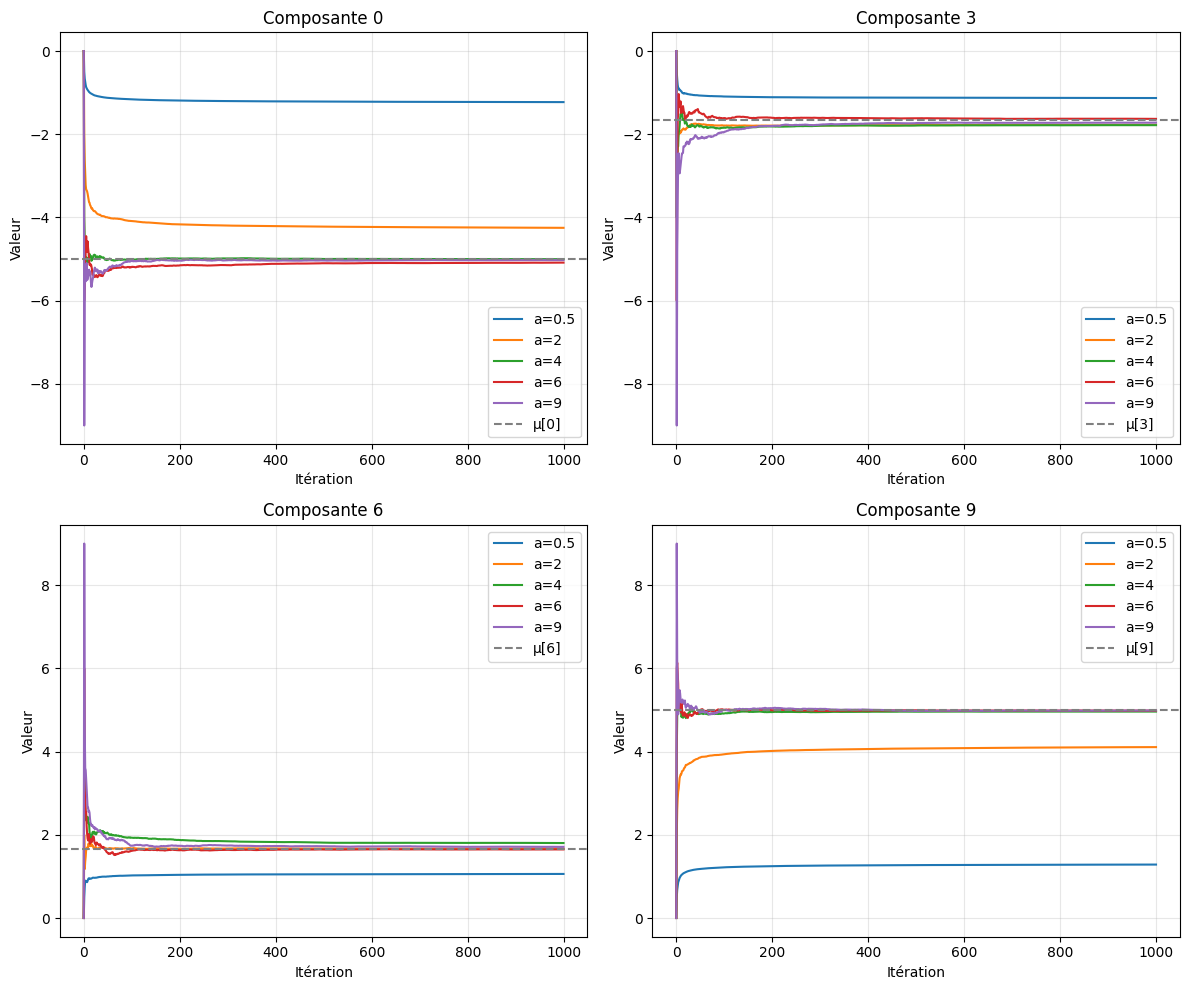

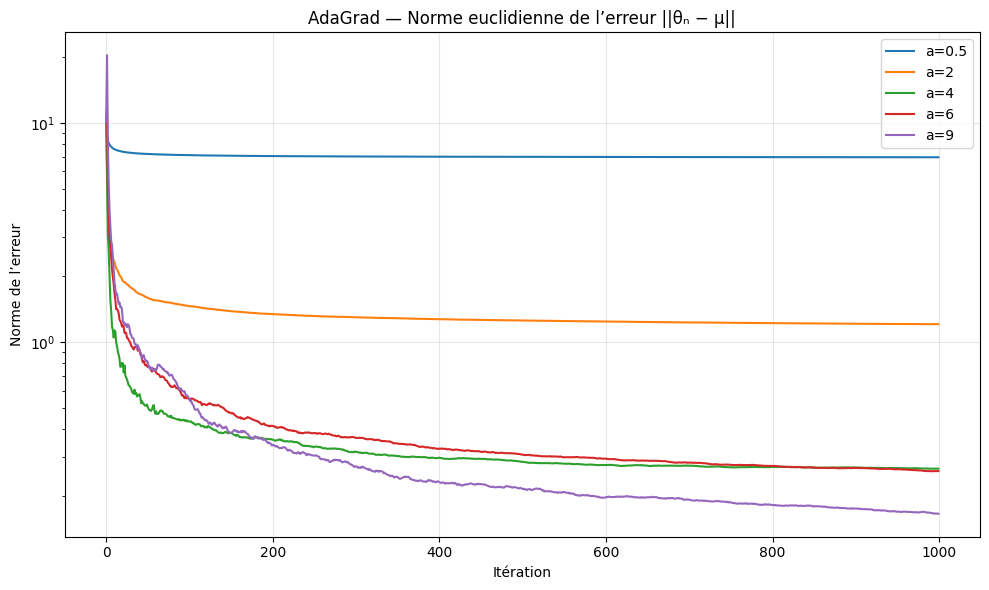

Erreur finale (AdaGrad) :
a=0.5  : 6.9593
a=2    : 1.2074
a=4    : 0.2652
a=6    : 0.2586
a=9    : 0.1651


In [22]:
thetainit = np.zeros(d)

Theta1 = AdaGrad(thetainit, 0.5, alpha=1, mu=mu, sigma=sigma, df=None)
Theta2 = AdaGrad(thetainit, 2, alpha=1, mu=mu, sigma=sigma, df=None)
Theta3 = AdaGrad(thetainit, 4, alpha=1, mu=mu, sigma=sigma, df=None)
Theta4 = AdaGrad(thetainit, 6, alpha=1, mu=mu, sigma=sigma, df=None)
Theta5 = AdaGrad(thetainit, 9, alpha=1, mu=mu, sigma=sigma, df=None)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
components_to_plot = [0, 3, 6, 9]

for idx, comp in enumerate(components_to_plot):
    ax = axes[idx // 2, idx % 2]

    ax.plot(Theta1[:, comp], label='a=0.5')
    ax.plot(Theta2[:, comp], label='a=2')
    ax.plot(Theta3[:, comp], label='a=4')
    ax.plot(Theta4[:, comp], label='a=6')
    ax.plot(Theta5[:, comp], label='a=9')
    ax.axhline(mu[comp], color='gray', linestyle='--', label=f'μ[{comp}]')

    ax.set_title(f'Composante {comp}')
    ax.set_xlabel('Itération')
    ax.set_ylabel('Valeur')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Norme de l'erreur
fig, ax = plt.subplots(figsize=(10, 6))

error1 = np.linalg.norm(Theta1 - mu, axis=1)
error2 = np.linalg.norm(Theta2 - mu, axis=1)
error3 = np.linalg.norm(Theta3 - mu, axis=1)
error4 = np.linalg.norm(Theta4 - mu, axis=1)
error5 = np.linalg.norm(Theta5 - mu, axis=1)

ax.plot(error1, label='a=0.5')
ax.plot(error2, label='a=2')
ax.plot(error3, label='a=4')
ax.plot(error4, label='a=6')
ax.plot(error5, label='a=9')

ax.set_title('AdaGrad — Norme euclidienne de l’erreur ||θₙ − μ||')
ax.set_xlabel('Itération')
ax.set_ylabel('Norme de l’erreur')
ax.set_yscale('log')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Erreur finale (AdaGrad) :")
print(f"a=0.5  : {error1[-1]:.4f}")
print(f"a=2    : {error2[-1]:.4f}")
print(f"a=4    : {error3[-1]:.4f}")
print(f"a=6    : {error4[-1]:.4f}")
print(f"a=9    : {error5[-1]:.4f}")

On voit avec ADAGRAD que le pas s'aténue beaucoup trop rapidement. Donc l'algorithme converge vers une valeur $\theta$ loin de la moyenne. Le pas s'essoufle trop rapidement et donc les meilleurs pas sont les plus grands dans la plus part des cas. Attention  si les premières valeurs du vecteur gaussien on obtient une valeur de G dans la mauvaise direction et de norme importante, le fait d'avoir un pas important est à double tranchant. Notament pour une loi de student les résultats risquent d'être très aléatoire. Ici avec une loi normal le pas le meilleur est celui le plus grand a = 9. C'est pourquoi ADAM devrait être plus performant parce qu'il prend en considération un terme de momentum et une décroissance du pas en $(1 / 1 - x^n)$

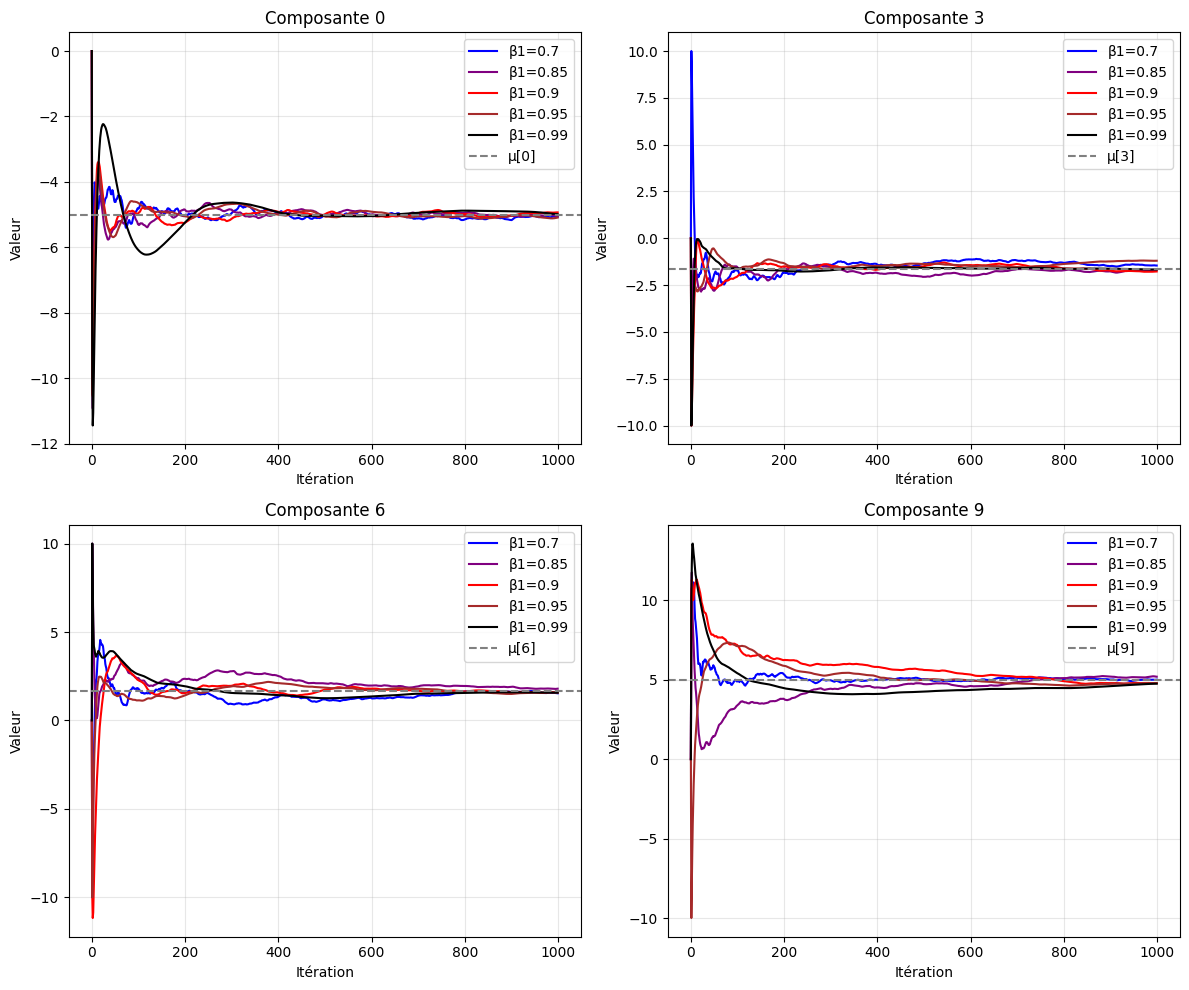

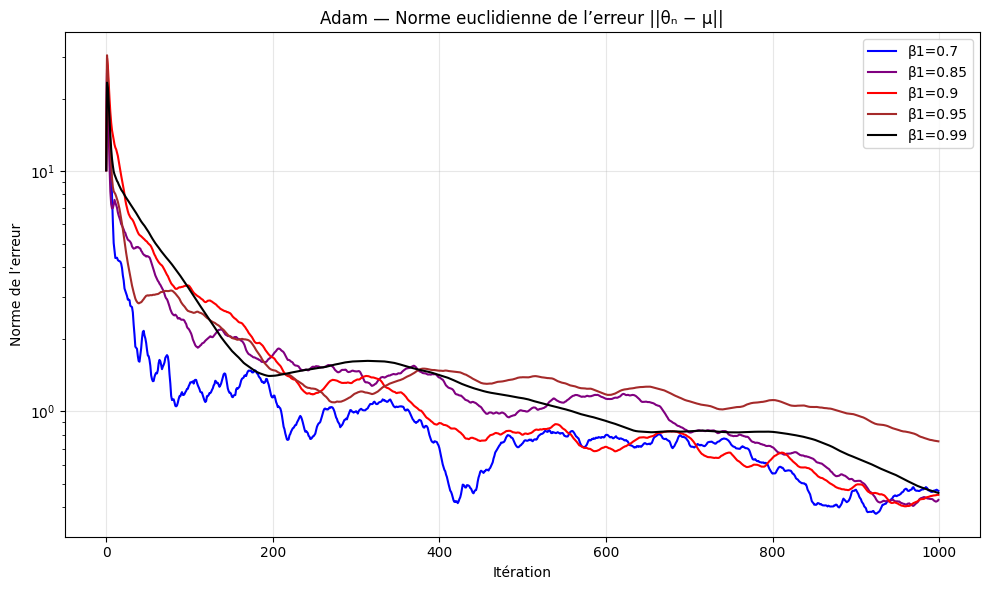

Erreur finale (Adam) :
β1=0.7  : 0.4665
β1=0.85 : 0.4279
β1=0.9  : 0.4492
β1=0.95 : 0.7503
β1=0.99 : 0.4576


In [13]:
thetainit = np.zeros(d)

# on fixe a et alpha, et on fait varier beta1 / beta2
a = 10
alpha = 1
df = None

# exemple : on fait varier beta1 (beta2 fixé)
beta2_fixed = 0.999
beta1_vals = [0.7, 0.85, 0.9, 0.95, 0.99]

Theta1 = Adam(thetainit, a, alpha=alpha, mu=mu, sigma=sigma, df=df, beta1=beta1_vals[0], beta2=beta2_fixed)
Theta2 = Adam(thetainit, a, alpha=alpha, mu=mu, sigma=sigma, df=df, beta1=beta1_vals[1], beta2=beta2_fixed)
Theta3 = Adam(thetainit, a, alpha=alpha, mu=mu, sigma=sigma, df=df, beta1=beta1_vals[2], beta2=beta2_fixed)
Theta4 = Adam(thetainit, a, alpha=alpha, mu=mu, sigma=sigma, df=df, beta1=beta1_vals[3], beta2=beta2_fixed)
Theta5 = Adam(thetainit, a, alpha=alpha, mu=mu, sigma=sigma, df=df, beta1=beta1_vals[4], beta2=beta2_fixed)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
components_to_plot = [0, 3, 6, 9]

for idx, comp in enumerate(components_to_plot):
    ax = axes[idx // 2, idx % 2]

    ax.plot(Theta1[:, comp], color='blue', label=f'β1={beta1_vals[0]}')
    ax.plot(Theta2[:, comp], color='purple', label=f'β1={beta1_vals[1]}')
    ax.plot(Theta3[:, comp], color='red', label=f'β1={beta1_vals[2]}')
    ax.plot(Theta4[:, comp], color='brown', label=f'β1={beta1_vals[3]}')
    ax.plot(Theta5[:, comp], color='black', label=f'β1={beta1_vals[4]}')
    ax.axhline(mu[comp], color='gray', linestyle='--', label=f'μ[{comp}]')

    ax.set_title(f'Composante {comp}')
    ax.set_xlabel('Itération')
    ax.set_ylabel('Valeur')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Norme de l'erreur
fig, ax = plt.subplots(figsize=(10, 6))

error1 = np.linalg.norm(Theta1 - mu, axis=1)
error2 = np.linalg.norm(Theta2 - mu, axis=1)
error3 = np.linalg.norm(Theta3 - mu, axis=1)
error4 = np.linalg.norm(Theta4 - mu, axis=1)
error5 = np.linalg.norm(Theta5 - mu, axis=1)

ax.plot(error1, color='blue', label=f'β1={beta1_vals[0]}')
ax.plot(error2, color='purple', label=f'β1={beta1_vals[1]}')
ax.plot(error3, color='red', label=f'β1={beta1_vals[2]}')
ax.plot(error4, color='brown', label=f'β1={beta1_vals[3]}')
ax.plot(error5, color='black', label=f'β1={beta1_vals[4]}')

ax.set_title('Adam — Norme euclidienne de l’erreur ||θₙ − μ||')
ax.set_xlabel('Itération')
ax.set_ylabel('Norme de l’erreur')
ax.set_yscale('log')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Erreur finale (Adam) :")
print(f"β1={beta1_vals[0]}  : {error1[-1]:.4f}")
print(f"β1={beta1_vals[1]} : {error2[-1]:.4f}")
print(f"β1={beta1_vals[2]}  : {error3[-1]:.4f}")
print(f"β1={beta1_vals[3]} : {error4[-1]:.4f}")
print(f"β1={beta1_vals[4]} : {error5[-1]:.4f}")


Dans le cas d’une distribution normale, nous avons choisi de ne faire varier que le paramètre $\beta_1$, mais il est tout aussi important de faire varier le paramètre $\beta_{2}$ qui influence la variation du pas. Nous l'avons pas fait et selon nous ça ne pause pas de problème car ces 2 paramètres ont la même vocation. Nous n'avons pas non plus décider de jouer avec le pas initial a qui n'est qu'une constante importante seulement au début. On a choisi 10 parce les $\mu_{i}$ sont dans [-5, 5].
$$
\Theta_{2}
= \Theta_{init}
- a\, \frac{\hat m_1}{\sqrt{\hat v_1} + \varepsilon},
$$
donne a = 10 une bonne solution au démarrage.

Sur le graphe on remarque que plus β₁ est grand, moins Adam est sensible aux outliers. La convergence est plus lente au début mais plus précise à long terme. On observe donc une diminution nette de l’erreur finale quand β₁ se rapproche de 1.

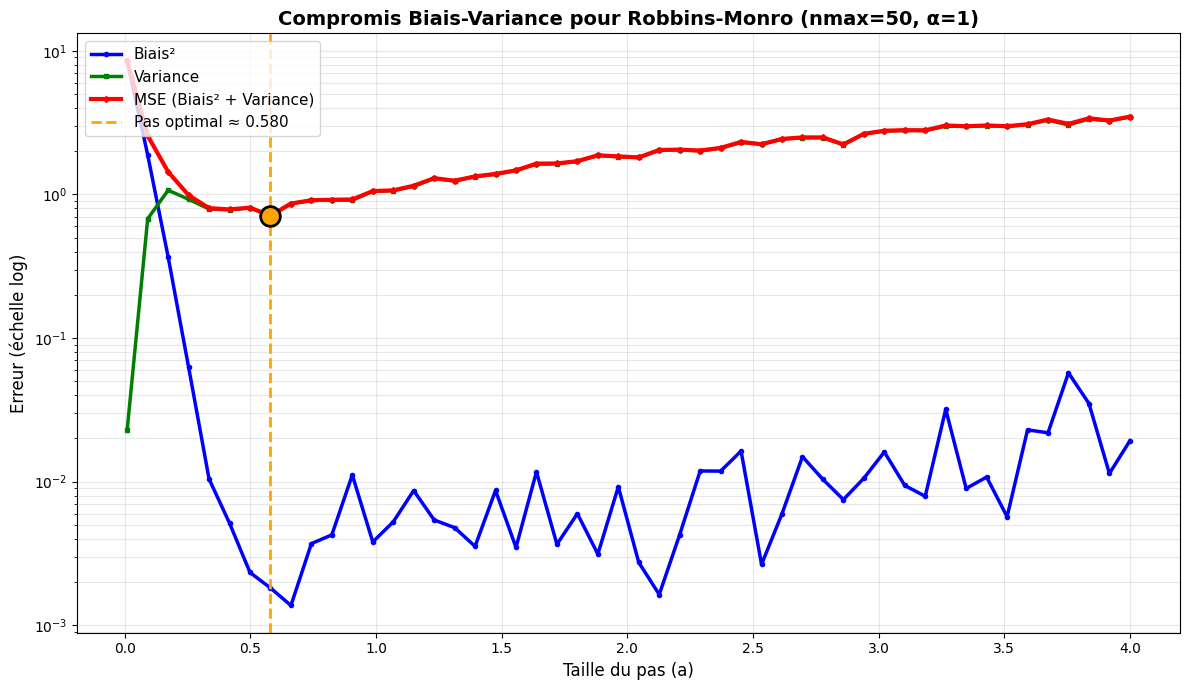

In [14]:

thetainit_bv = np.zeros(d)  # pour la reproductibilité
df = None
Steps = np.linspace(0.01, 4, 50)  # 50 valeurs de pas à tester
Bias_squared, Variance, MSE = RobbinsMonroForVaryingStepSize(
    thetainit=thetainit_bv, 
    Steps=Steps, 
    alpha=1, 
    mu=mu, 
    sigma=sigma,
    df = None,
    nmax=50, 
    nsimu=200  # 200 simulations par pas
)

# Trouver le pas optimal (MSE minimal)
optimal_idx = np.argmin(MSE)
optimal_step = Steps[optimal_idx]

fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(Steps, Bias_squared, color='blue', label='Biais²', linewidth=2.5, marker='o', markersize=3)
ax.plot(Steps, Variance, color='green', label='Variance', linewidth=2.5, marker='s', markersize=3)
ax.plot(Steps, MSE, color='red', label='MSE (Biais² + Variance)', linewidth=3, marker='D', markersize=3)

# Marquer le pas optimal
ax.axvline(optimal_step, color='orange', linestyle='--', linewidth=2, 
           label=f'Pas optimal ≈ {optimal_step:.3f}')
ax.scatter([optimal_step], [MSE[optimal_idx]], color='orange', s=200, zorder=5, 
           edgecolors='black', linewidths=2)

ax.set_yscale('log')
ax.set_xlabel('Taille du pas (a)', fontsize=12)
ax.set_ylabel('Erreur (échelle log)', fontsize=12)
ax.set_title('Compromis Biais-Variance pour Robbins-Monro (nmax=50, α=1)', 
             fontsize=14, fontweight='bold')
ax.legend(fontsize=11, loc='upper left')
ax.grid(True, alpha=0.3, which='both')
plt.tight_layout()
plt.show()

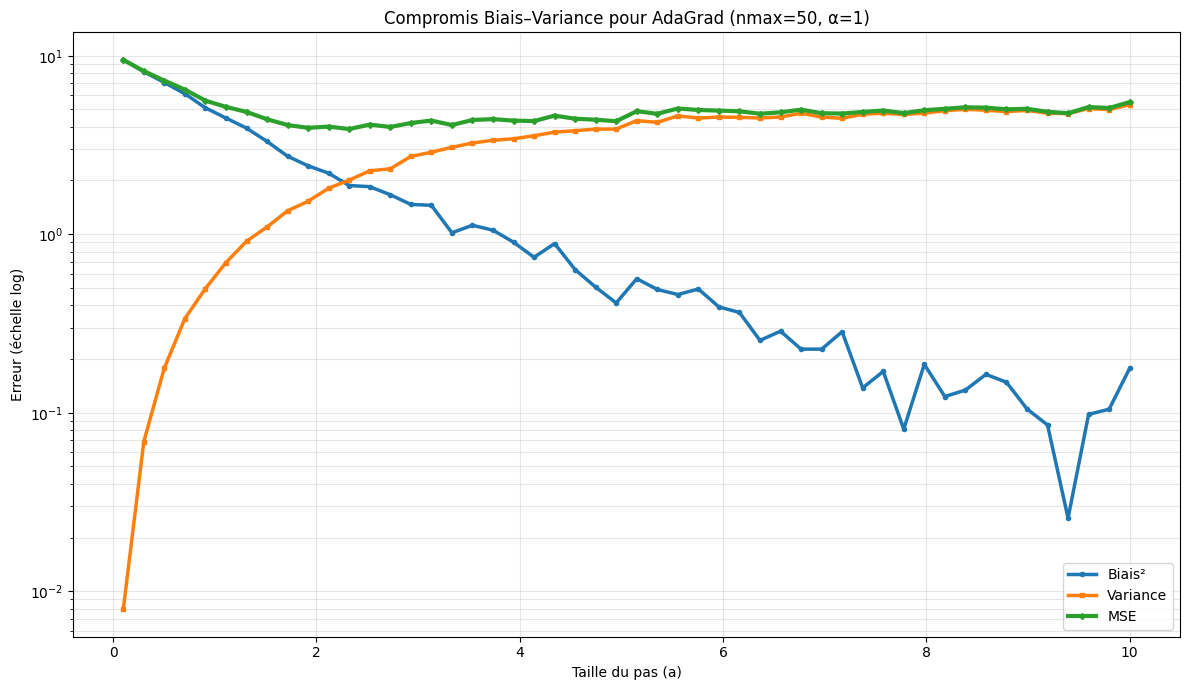

In [15]:
thetainit_bv = np.zeros(d)  # pour la reproductibilité

Steps = np.linspace(0.1, 10, 50)

Bias_squared, Variance, MSE = AdaGradForVaryingStepSize(
    thetainit=thetainit_bv,
    Steps=Steps,
    alpha=1,
    mu=mu,
    sigma=sigma,
    df=None,
    nmax=50,
    nsimu=200
)

fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(Steps, Bias_squared, label='Biais²', linewidth=2.5, marker='o', markersize=3)
ax.plot(Steps, Variance, label='Variance', linewidth=2.5, marker='s', markersize=3)
ax.plot(Steps, MSE, label='MSE', linewidth=3, marker='D', markersize=3)

ax.set_yscale('log')
ax.set_xlabel('Taille du pas (a)')
ax.set_ylabel('Erreur (échelle log)')
ax.set_title('Compromis Biais–Variance pour AdaGrad (nmax=50, α=1)')
ax.legend()
ax.grid(True, alpha=0.3, which='both')
plt.tight_layout()
plt.show()

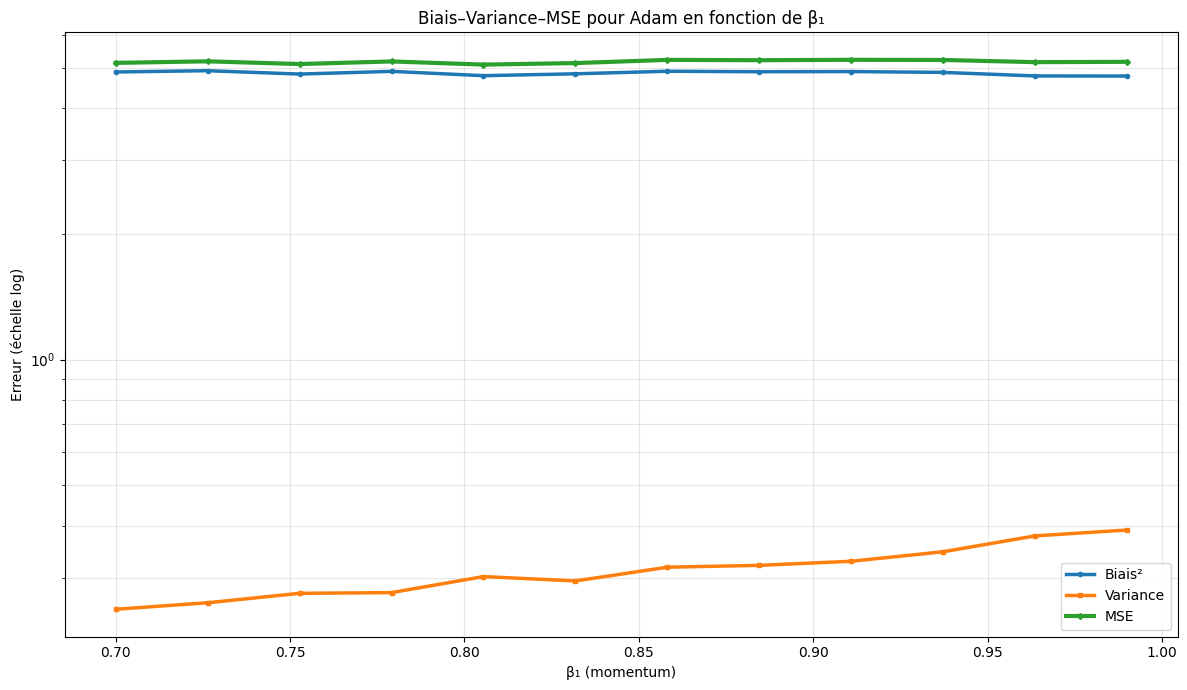

In [16]:
thetainit_bv = np.zeros(d)

# paramètres fixés
a = 0.5
alpha = 1
df = None
beta2_fixed = 0.999

beta1s = np.linspace(0.7, 0.99, 12)

Bias_squared, Variance, MSE = AdamForVarying_beta1(
    thetainit=thetainit_bv,
    beta1s=beta1s,
    a=a,
    alpha=alpha,
    mu=mu,
    sigma=sigma,
    df=df,
    nmax=50,
    nsimu=200,
    beta2=beta2_fixed
)

fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(beta1s, Bias_squared, label='Biais²', linewidth=2.5, marker='o', markersize=3)
ax.plot(beta1s, Variance, label='Variance', linewidth=2.5, marker='s', markersize=3)
ax.plot(beta1s, MSE, label='MSE', linewidth=3, marker='D', markersize=3)

ax.set_yscale('log')
ax.set_xlabel('β₁ (momentum)')
ax.set_ylabel('Erreur (échelle log)')
ax.set_title('Biais–Variance–MSE pour Adam en fonction de β₁')
ax.legend()
ax.grid(True, alpha=0.3, which='both')
plt.tight_layout()
plt.show()


Sur la figure, on voit que la MSE est quasiment la même chose que le $biais^2$. Les deux courbes sont presque confondues, donc ça veut dire que l’erreur vient surtout du biais. La variance est très petite par rapport au reste, elle est autour de $10^{-2}$, alors que le biais$^2$ est de l’ordre de $1$, donc son effet sur la MSE est presque négligeable.

Quand on augmente $\beta_1$, on voit que la variance augmente un peu. C’est logique parce que l’algorithme garde plus en mémoire les gradients passés et réagit moins vite aux nouvelles réalisations du bruit. En même temps, le biais diminue légèrement, ce qui montre que le lissage des gradients aide Adam à mieux se rapprocher de la moyenne $\mu$, surtout avec un bruit de type Student où il y a des valeurs extrêmes.

Au final, même si la variance augmente un peu quand $\beta_1$ devient grand, la baisse du biais est plus importante. Du coup la MSE diminue globalement. L’effet reste assez faible parce que le problème est simple et qu’Adam est déjà assez robuste de base, mais on voit quand même que prendre des valeurs de $\beta_1$ élevées donne de meilleurs résultats dans ce cas.


# Loi de Student

La loi de student a des queues plus épaisses que la loi normale. Du coup on a plus souvent des valeurs très éloignées de la moyenne. Concrètement ça veut dire que le bruit peut être très grand parfois. Dans Robbins–Monro, si le pas ne diminue pas assez vite, une grosse réalisation peut faire partir l’algorithme loin de la solution ou le faire osciller sans vraiment converger. Donc il faut faire attention à la décroissance du pas.

AdaGrad adapte son pas en fonction des gradients observés avant. Avec une loi de student, comme on a souvent des outliers, les gradients peuvent être très grands. Ces gros gradients s’accumulent dans la somme des carrés, ce qui fait chuter le pas très vite. Du coup l’algorithme peut devenir très lent, surtout après quelques grosses perturbations. On peut donc penser qu’AdaGrad n’est pas très adapté quand le bruit suit une loi de student.

Adam on peut penser qu’il va mieux se comporter. Il y a un effet de momentum, donc même si la loi de student donne souvent des points très éloignés, les variations sont lissées dans le temps. Les moyennes exponentielles des gradients et des gradients au carré rendent l’algorithme moins sensible aux valeurs extrêmes. Même si en moyenne il y a plus de grosses réalisations qu’avec une loi normale, Adam réagit moins violemment. C’est pour ça que prendre des $\beta_1$ et $\beta_2$ proches de 1 peut aider, parce que ça renforce encore cet effet de lissage.

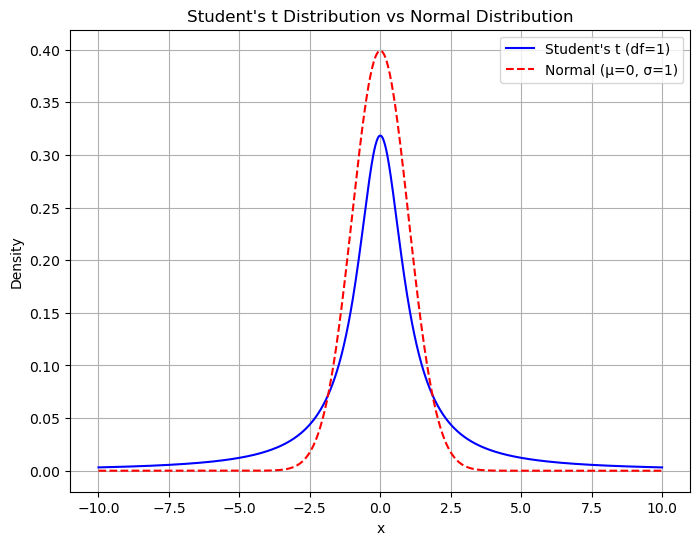

In [50]:
df = 1
x = np.linspace(-10, 10, 1000)
pdf = stats.t.pdf(x, df, scale=1)

plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label=f"Student's t (df={df})", color='blue')

# Optionally, compare with normal distribution
normal_pdf = stats.norm.pdf(x, 0, 1)
plt.plot(x, normal_pdf, label='Normal (μ=0, σ=1)', color='red', linestyle='--')

plt.title("Student's t Distribution vs Normal Distribution")
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
d = 10
df = np.linspace(1, 5, d)
mu = np.linspace(-5, 5, d)
sigma = 1

def G_student(theta, mu, sigma, df):
    d = len(mu)
    epsilon = np.zeros(d)
    
    for i in range(d):
        epsilon[i] = stats.t.rvs(df=df[i], loc=mu[i], scale = sigma)
    
    return 2 * (theta - epsilon)

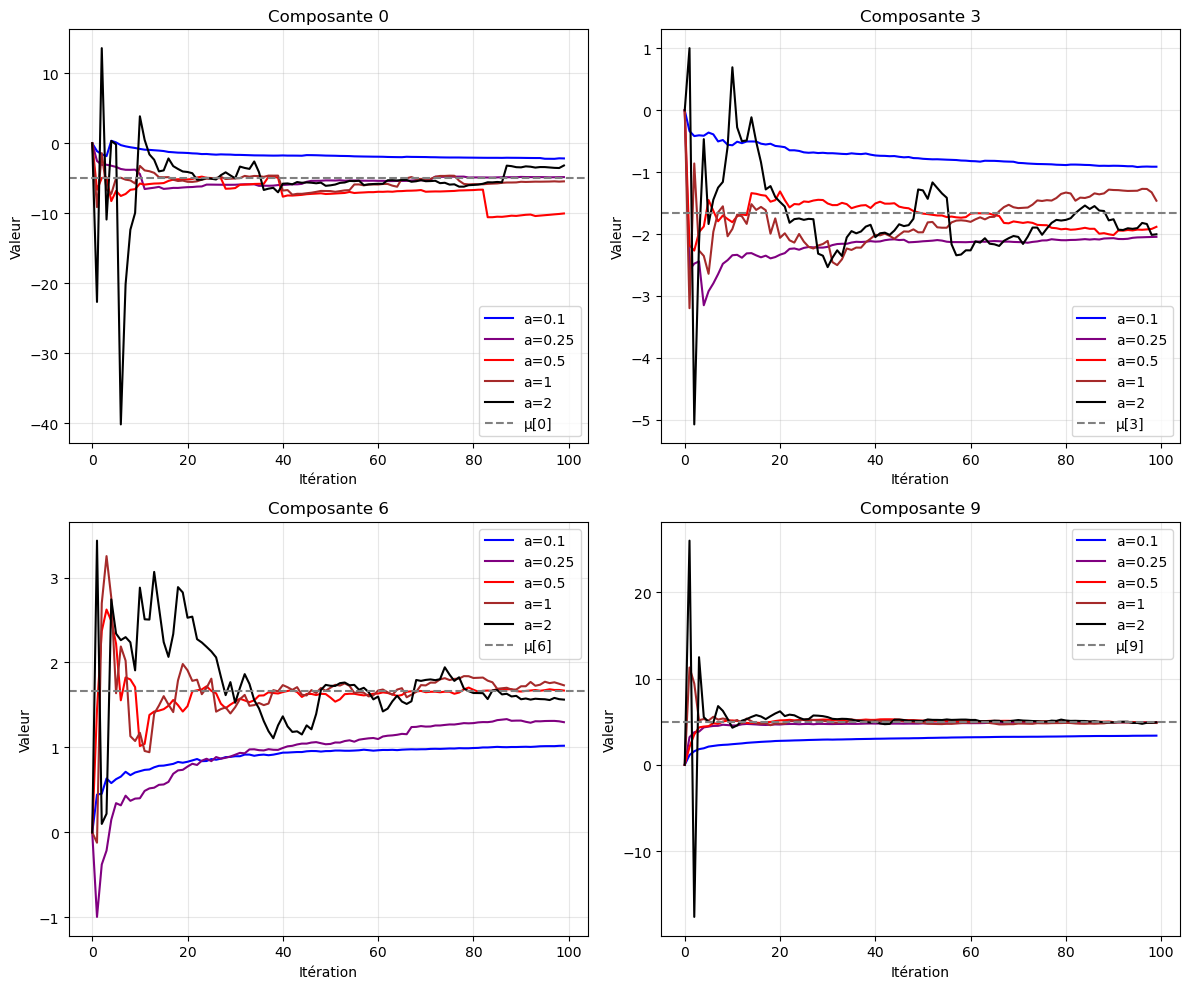

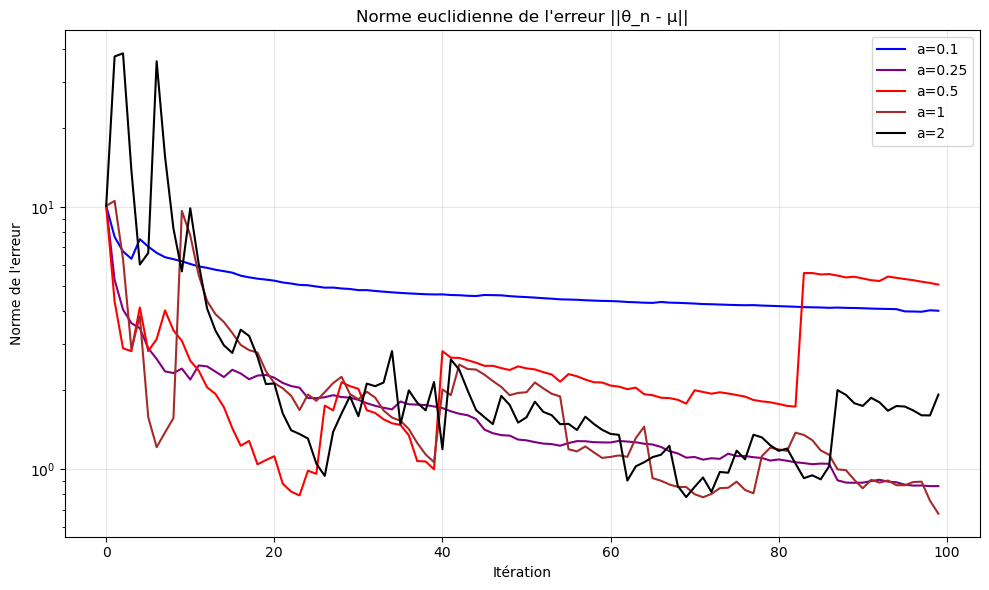

Erreur finale (norme) pour chaque valeur de a:
a=0.1  : 4.0146
a=0.25 : 0.8604
a=0.5  : 5.0520
a=1    : 0.6752
a=2    : 1.9224


In [53]:

thetainit = np.zeros(d) # pour la reproductibilité

Theta1 = RobbinsMonro(thetainit, 0.1, alpha=1, mu=mu, sigma= sigma, df=df, G=G_student)
Theta2 = RobbinsMonro(thetainit, 0.25, alpha=1, mu=mu, sigma=sigma, df=df, G=G_student)
Theta3 = RobbinsMonro(thetainit, 0.5, alpha=1, mu=mu, sigma=sigma, df=df, G=G_student)
Theta4 = RobbinsMonro(thetainit, 1, alpha=1, mu=mu, sigma=sigma, df=df, G=G_student)
Theta5 = RobbinsMonro(thetainit, 2, alpha=1, mu=mu, sigma=sigma, df=df, G=G_student)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
components_to_plot = [0, 3, 6, 9]  

for idx, comp in enumerate(components_to_plot):
    ax = axes[idx // 2, idx % 2]
    
    ax.plot(Theta1[:, comp], color='blue', label='a=0.1')
    ax.plot(Theta2[:, comp], color='purple', label='a=0.25')
    ax.plot(Theta3[:, comp], color='red', label='a=0.5')
    ax.plot(Theta4[:, comp], color='brown', label='a=1')
    ax.plot(Theta5[:, comp], color='black', label='a=2')
    ax.axhline(mu[comp], color='gray', linestyle='--', label=f'μ[{comp}]')
    ax.set_title(f'Composante {comp}')
    ax.set_xlabel('Itération')
    ax.set_ylabel('Valeur')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Visualisation de la norme de l'erreur
fig, ax = plt.subplots(figsize=(10, 6))

error1 = np.linalg.norm(Theta1 - mu, axis=1)
error2 = np.linalg.norm(Theta2 - mu, axis=1)
error3 = np.linalg.norm(Theta3 - mu, axis=1)
error4 = np.linalg.norm(Theta4 - mu, axis=1)
error5 = np.linalg.norm(Theta5 - mu, axis=1)

ax.plot(error1, color='blue', label='a=0.1')
ax.plot(error2, color='purple', label='a=0.25')
ax.plot(error3, color='red', label='a=0.5')
ax.plot(error4, color='brown', label='a=1')
ax.plot(error5, color='black', label='a=2')

ax.set_title('Norme euclidienne de l\'erreur ||θ_n - μ||')
ax.set_xlabel('Itération')
ax.set_ylabel('Norme de l\'erreur')
ax.set_yscale('log')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Erreur finale (norme) pour chaque valeur de a:")
print(f"a=0.1  : {error1[-1]:.4f}")
print(f"a=0.25 : {error2[-1]:.4f}")
print(f"a=0.5  : {error3[-1]:.4f}")
print(f"a=1    : {error4[-1]:.4f}")
print(f"a=2    : {error5[-1]:.4f}")

On voit clairement que pour les composantes de loi de student avec de faibles degrés de liberté sont très dificiles. Les pas plus importants peuvent parfois bien convergé mais globalement c'est les pas entre 0.1 et 0.5 qui marchent le mieux. Un pas trop important fait varier $\theta$ beaucoup plus quand la loi touche une valeur en queue de distribution.   

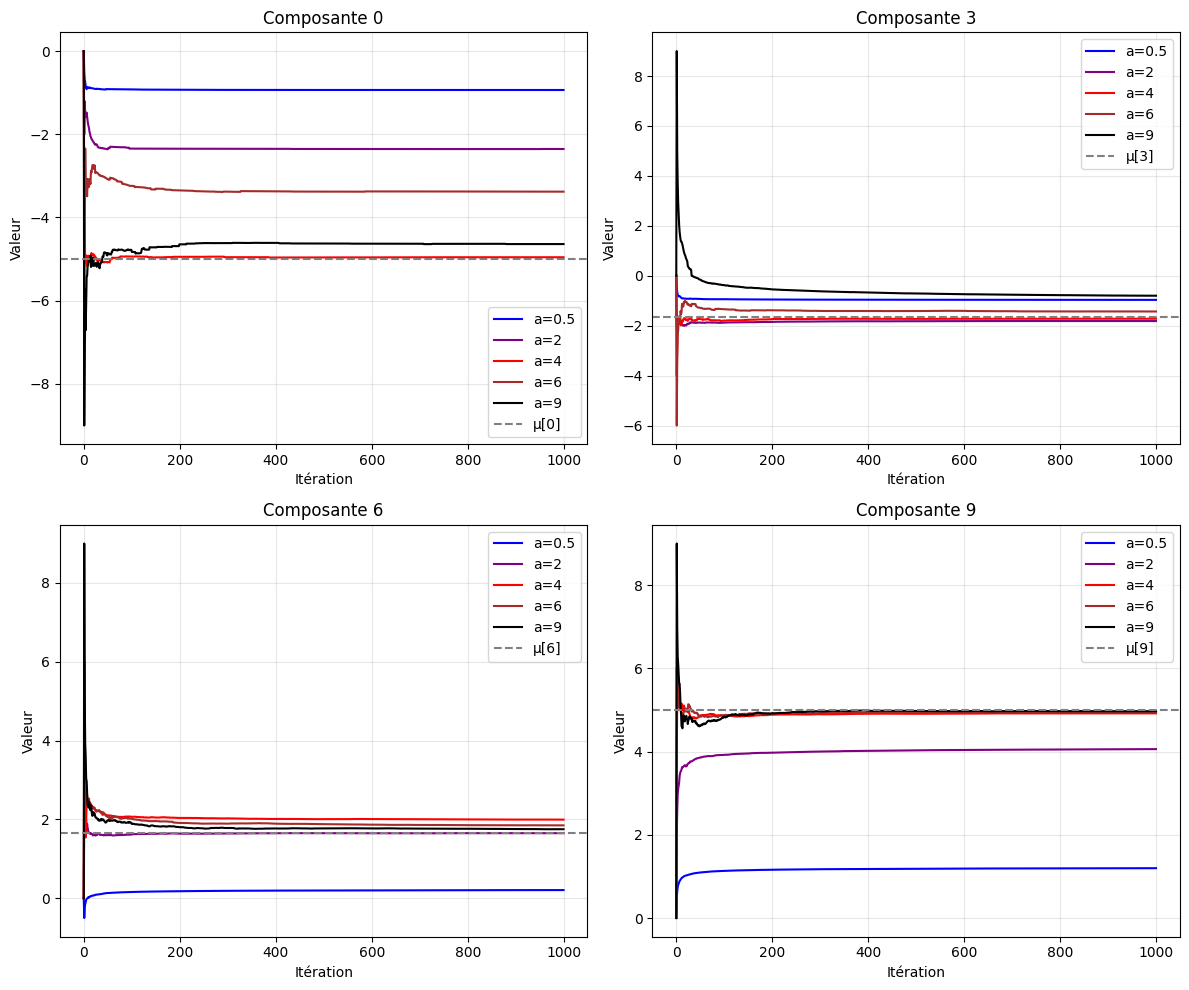

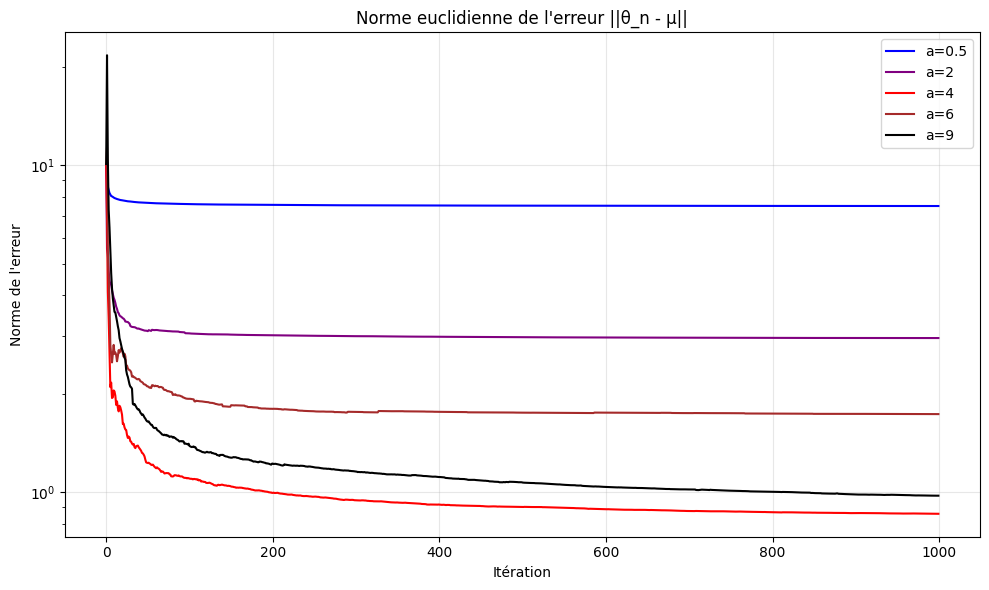

Erreur finale (norme) pour chaque valeur de a:
a=0.5  : 7.5057
a=2    : 2.9594
a=4    : 0.8575
a=6    : 1.7314
a=9    : 0.9742


In [20]:
thetainit = np.zeros(d) # pour la reproductibilité

Theta1 = AdaGrad(thetainit, 0.5, alpha=1, mu=mu, sigma=sigma, df=df, G=G_student)
Theta2 = AdaGrad(thetainit, 2, alpha=1, mu=mu, sigma=sigma, df=df, G=G_student)
Theta3 = AdaGrad(thetainit, 4, alpha=1, mu=mu, sigma=sigma, df=df, G=G_student)
Theta4 = AdaGrad(thetainit, 6, alpha=1, mu=mu, sigma=sigma, df=df, G=G_student)
Theta5 = AdaGrad(thetainit, 9, alpha=1, mu=mu, sigma=sigma, df=df, G=G_student)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
components_to_plot = [0, 3, 6, 9]  

for idx, comp in enumerate(components_to_plot):
    ax = axes[idx // 2, idx % 2]

    ax.plot(Theta1[:, comp], color='blue', label='a=0.5')
    ax.plot(Theta2[:, comp], color='purple', label='a=2')
    ax.plot(Theta3[:, comp], color='red', label='a=4')
    ax.plot(Theta4[:, comp], color='brown', label='a=6')
    ax.plot(Theta5[:, comp], color='black', label='a=9')
    ax.axhline(mu[comp], color='gray', linestyle='--', label=f'μ[{comp}]')
    ax.set_title(f'Composante {comp}')
    ax.set_xlabel('Itération')
    ax.set_ylabel('Valeur')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Visualisation de la norme de l'erreur
fig, ax = plt.subplots(figsize=(10, 6))

error1 = np.linalg.norm(Theta1 - mu, axis=1)
error2 = np.linalg.norm(Theta2 - mu, axis=1)
error3 = np.linalg.norm(Theta3 - mu, axis=1)
error4 = np.linalg.norm(Theta4 - mu, axis=1)
error5 = np.linalg.norm(Theta5 - mu, axis=1)

ax.plot(error1, color='blue', label='a=0.5')
ax.plot(error2, color='purple', label='a=2')
ax.plot(error3, color='red', label='a=4')
ax.plot(error4, color='brown', label='a=6')
ax.plot(error5, color='black', label='a=9')
ax.set_title('Norme euclidienne de l\'erreur ||θ_n - μ||')
ax.set_xlabel('Itération')
ax.set_ylabel('Norme de l\'erreur')
ax.set_yscale('log')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Erreur finale (norme) pour chaque valeur de a:")
print(f"a=0.5  : {error1[-1]:.4f}")
print(f"a=2    : {error2[-1]:.4f}")
print(f"a=4    : {error3[-1]:.4f}")
print(f"a=6    : {error4[-1]:.4f}")
print(f"a=9    : {error5[-1]:.4f}")

Ici on regarde AdaGrad avec la loi de Student. On voit que quand le pas est petit, comme a = 0.5 ou 2, l’algorithme avance très lentement et reste loin de la moyenne μ, donc l’erreur finale est assez grande. Quand on augmente le pas, AdaGrad se rapproche mieux de μ, mais il reste quand même un biais. Ça vient du fait que le pas effectif diminue très vite à cause de l’accumulation des gradients, surtout avec la loi de Student qui donne souvent des valeurs extrêmes. Même avec un pas initial assez grand, AdaGrad devient rapidement trop prudent. Ici, c'est très intéressant par rapport à la loi normale, le meilleur pas n'est plus a = 9 mais a = 4. Pour a = 6, on voit ici qu'il y a eu au début plusieurs "outliers" ce qui a stopper l'avancement de $\theta$ vers l'optimal et qui a diminué le pas. Le pas a = 4 a peut-être eu plus de chance. Cette technique d'optimisation n'est pas non plus adapté à des perturbations fortes.

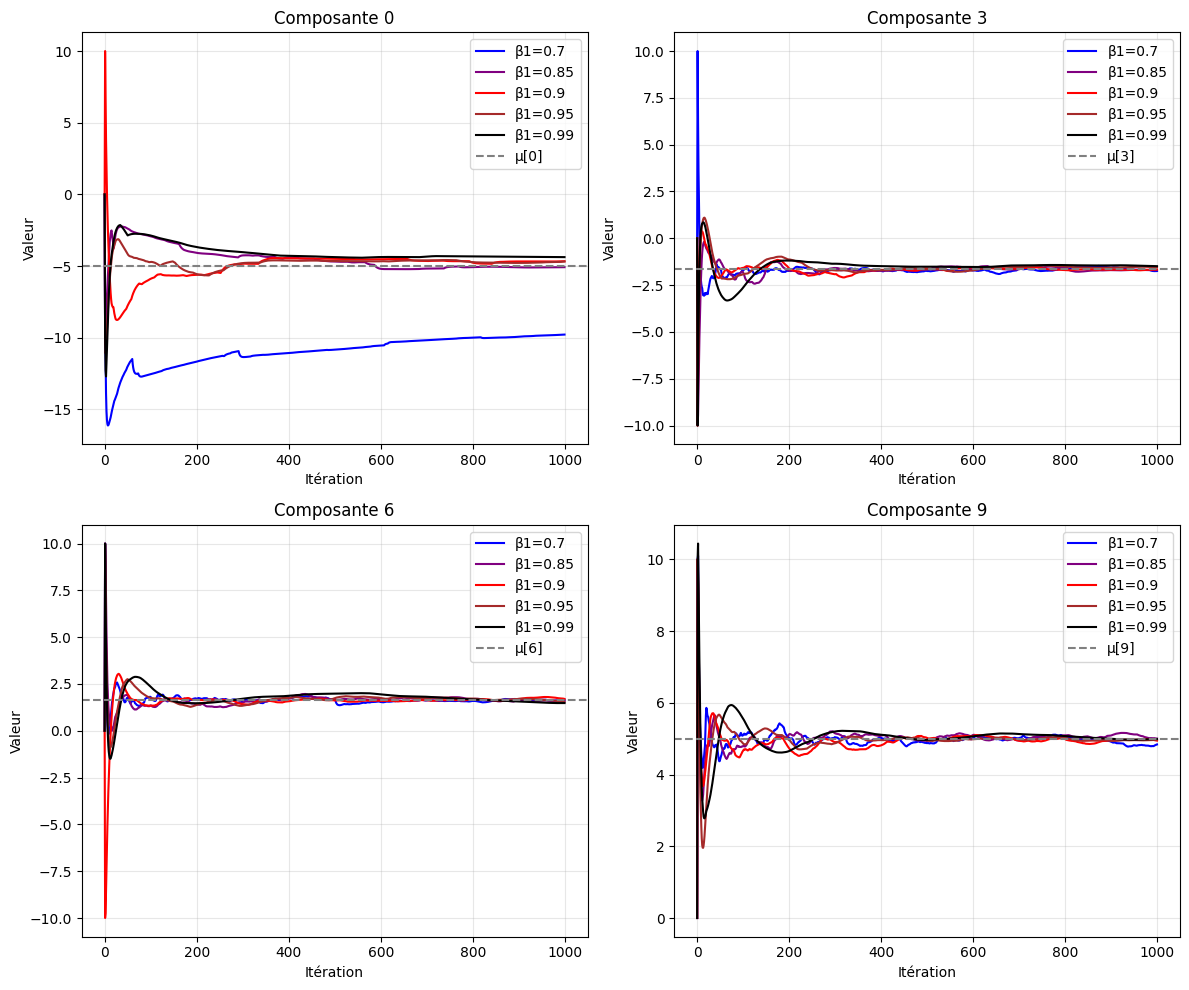

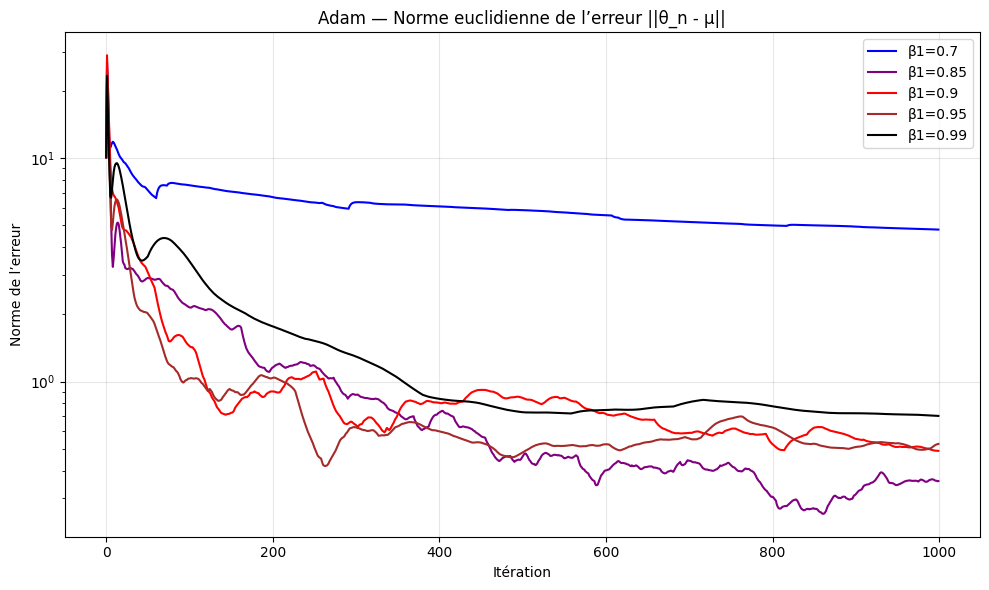

Erreur finale (norme) pour chaque valeur de β1 :
β1=0.7  : 4.7914
β1=0.85 : 0.3586
β1=0.9  : 0.4897
β1=0.95 : 0.5261
β1=0.99 : 0.7022


In [24]:
thetainit = np.zeros(d)  # pour la reproductibilité

# paramètres fixés
a = 10
alpha = 1
beta2_fixed = 0.999

# valeurs de beta1 à tester
beta1_vals = [0.7, 0.85, 0.9, 0.95, 0.99]

Theta1 = Adam(thetainit, a, alpha=alpha, mu=mu, sigma=sigma, df=df, G=G_student,
              beta1=beta1_vals[0], beta2=beta2_fixed)
Theta2 = Adam(thetainit, a, alpha=alpha, mu=mu, sigma=sigma, df=df, G=G_student,
              beta1=beta1_vals[1], beta2=beta2_fixed)
Theta3 = Adam(thetainit, a, alpha=alpha, mu=mu, sigma=sigma, df=df, G=G_student,
              beta1=beta1_vals[2], beta2=beta2_fixed)
Theta4 = Adam(thetainit, a, alpha=alpha, mu=mu, sigma=sigma, df=df, G=G_student,
              beta1=beta1_vals[3], beta2=beta2_fixed)
Theta5 = Adam(thetainit, a, alpha=alpha, mu=mu, sigma=sigma, df=df, G=G_student,
              beta1=beta1_vals[4], beta2=beta2_fixed)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
components_to_plot = [0, 3, 6, 9]  

for idx, comp in enumerate(components_to_plot):
    ax = axes[idx // 2, idx % 2]
    
    ax.plot(Theta1[:, comp], color='blue', label=f'β1={beta1_vals[0]}')
    ax.plot(Theta2[:, comp], color='purple', label=f'β1={beta1_vals[1]}')
    ax.plot(Theta3[:, comp], color='red', label=f'β1={beta1_vals[2]}')
    ax.plot(Theta4[:, comp], color='brown', label=f'β1={beta1_vals[3]}')
    ax.plot(Theta5[:, comp], color='black', label=f'β1={beta1_vals[4]}')
    ax.axhline(mu[comp], color='gray', linestyle='--', label=f'μ[{comp}]')
    ax.set_title(f'Composante {comp}')
    ax.set_xlabel('Itération')
    ax.set_ylabel('Valeur')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Visualisation de la norme de l'erreur
fig, ax = plt.subplots(figsize=(10, 6))

error1 = np.linalg.norm(Theta1 - mu, axis=1)
error2 = np.linalg.norm(Theta2 - mu, axis=1)
error3 = np.linalg.norm(Theta3 - mu, axis=1)
error4 = np.linalg.norm(Theta4 - mu, axis=1)
error5 = np.linalg.norm(Theta5 - mu, axis=1)

ax.plot(error1, color='blue', label=f'β1={beta1_vals[0]}')
ax.plot(error2, color='purple', label=f'β1={beta1_vals[1]}')
ax.plot(error3, color='red', label=f'β1={beta1_vals[2]}')
ax.plot(error4, color='brown', label=f'β1={beta1_vals[3]}')
ax.plot(error5, color='black', label=f'β1={beta1_vals[4]}')

ax.set_title('Adam — Norme euclidienne de l’erreur ||θ_n - μ||')
ax.set_xlabel('Itération')
ax.set_ylabel('Norme de l’erreur')
ax.set_yscale('log')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Erreur finale (norme) pour chaque valeur de β1 :")
print(f"β1={beta1_vals[0]}  : {error1[-1]:.4f}")
print(f"β1={beta1_vals[1]} : {error2[-1]:.4f}")
print(f"β1={beta1_vals[2]}  : {error3[-1]:.4f}")
print(f"β1={beta1_vals[3]} : {error4[-1]:.4f}")
print(f"β1={beta1_vals[4]} : {error5[-1]:.4f}")


Même chose on fait varier que $\beta_1$.

Sur les figures, on voit que toutes les composantes convergent toujours assez bien vers la valeur cible $\mu$.

Ici, on voit clairement que les valeurs de $\beta_1$ faible augmente l'influence du bruit sur la découverte du $\theta_*$. Et la courbe avec degree of freedom petit sur la composante en témoigne.

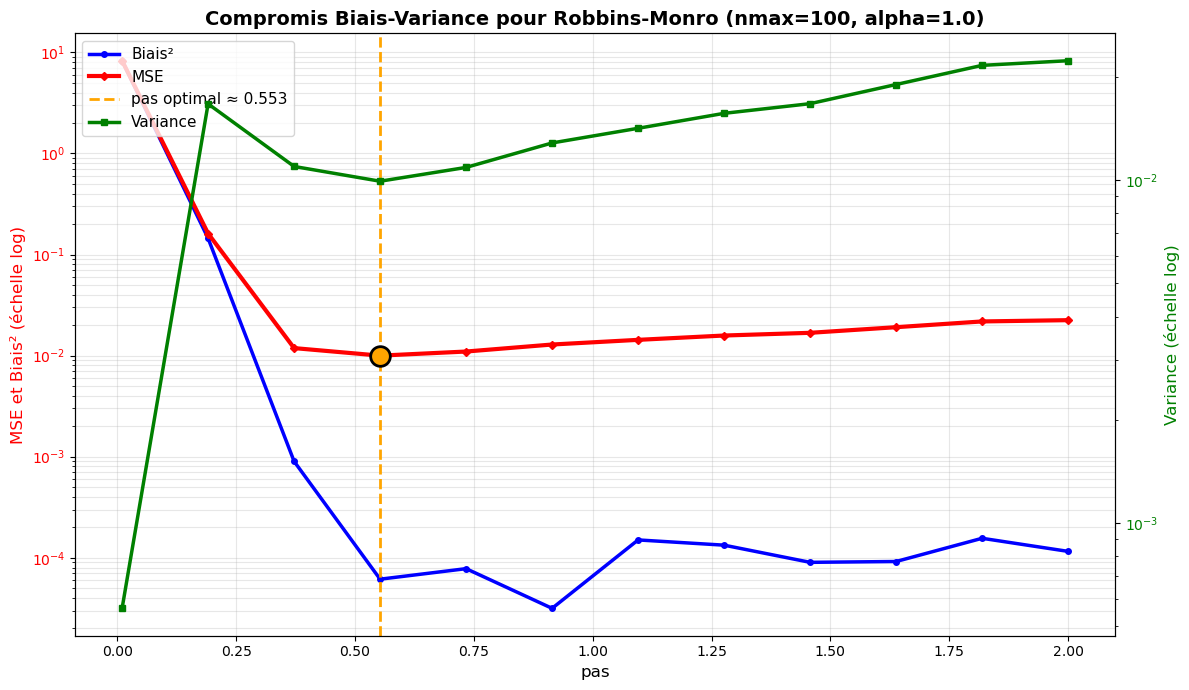

In [60]:

thetainit_bv = np.zeros(d)  # pour la reproductibilité
Steps = np.linspace(0.01, 2, 12)  # 50 valeurs de pas à tester
Bias_squared, Variance, MSE = RobbinsMonroForVaryingStepSize(
    thetainit=thetainit_bv, 
    Steps=Steps, 
    alpha=1, 
    mu=mu,
    df = df,
    sigma=sigma,
    nmax=100, 
    nsimu=200  # 200 simulations par pas
    
)

# Trouver le pas optimal (MSE minimal)
optimal_idx = np.argmin(MSE)
optimal_step = Steps[optimal_idx]

fig, ax1 = plt.subplots(figsize=(12, 7))

# Axe gauche pour Biais² et MSE
color1 = 'red'
ax1.set_xlabel('pas', fontsize=12)
ax1.set_ylabel('MSE et Biais² (échelle log)', fontsize=12, color=color1)
ax1.plot(Steps, Bias_squared, color='blue', label='Biais²', linewidth=2.5, marker='o', markersize=4)
ax1.plot(Steps, MSE, color='red', label='MSE', linewidth=3, marker='D', markersize=4)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_yscale('log')
ax1.grid(True, alpha=0.3, which='both')

# Axe droit pour Variance
ax2 = ax1.twinx()
color2 = 'green'
ax2.set_ylabel('Variance (échelle log)', fontsize=12, color=color2)
ax2.plot(Steps, Variance, color='green', label='Variance', linewidth=2.5, marker='s', markersize=4)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_yscale('log')

# Marquer le pas optimal
ax1.axvline(optimal_step, color='orange', linestyle='--', linewidth=2, 
            label=f'pas optimal ≈ {optimal_step:.3f}')
ax1.scatter([optimal_step], [MSE[optimal_idx]], color='orange', s=200, zorder=5, 
            edgecolors='black', linewidths=2)

# Légendes combinées
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, fontsize=11, loc='upper left')

ax1.set_title('Compromis Biais-Variance pour Robbins-Monro (nmax=100, alpha=1.0)', 
              fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

L'analyse biais-variance pour plusieurs valeurs de pas montre pour alpha fixé à ($\alpha$ = 1.0) que le pas optimum est 0.5 environ. 

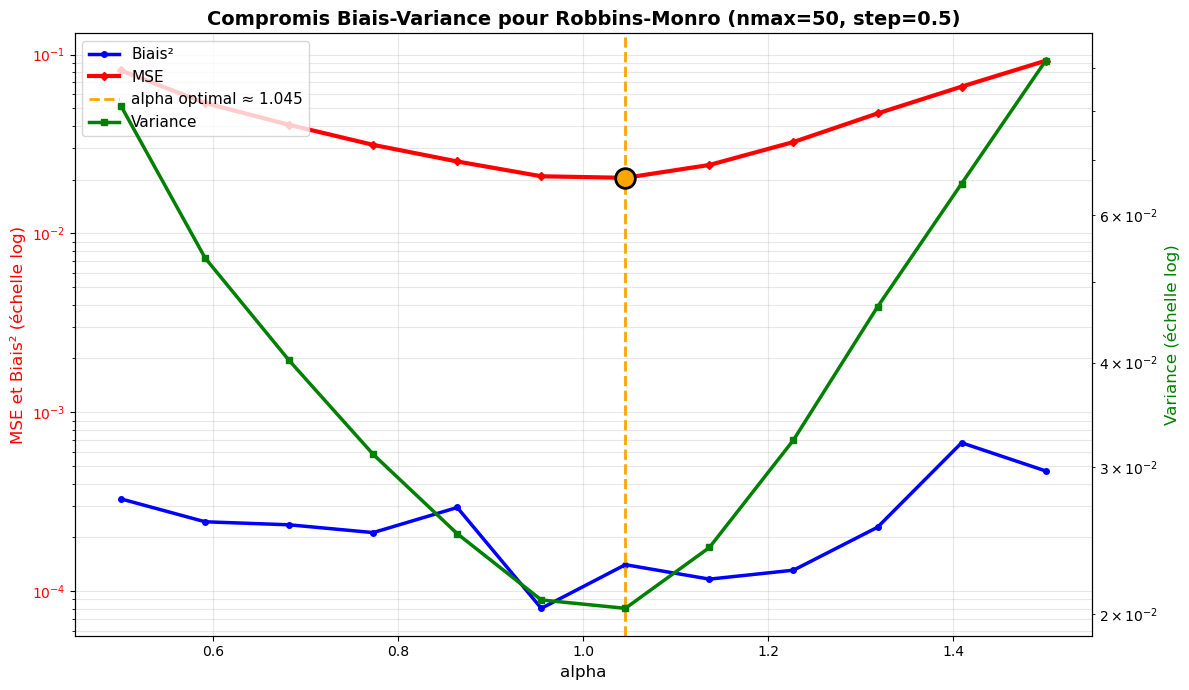

In [27]:

thetainit_bv = np.zeros(d)  # pour la reproductibilité
df =None
alphas = np.linspace(0.5, 1.5, 12)  # 50 valeurs de pas à tester
Bias_squared, Variance, MSE = RobbinsMonroForVarying_alphas(
    thetainit=thetainit_bv, 
    step=0.5, 
    alphas=alphas, 
    mu=mu,
    df = df,
    sigma=sigma,
    nmax=50, 
    nsimu=200  # 200 simulations par pas
    
)

# Trouver le pas optimal (MSE minimal)
optimal_idx = np.argmin(MSE)
optimal_step = alphas[optimal_idx]

fig, ax1 = plt.subplots(figsize=(12, 7))

# Axe gauche pour Biais² et MSE
color1 = 'red'
ax1.set_xlabel('alpha', fontsize=12)
ax1.set_ylabel('MSE et Biais² (échelle log)', fontsize=12, color=color1)
ax1.plot(alphas, Bias_squared, color='blue', label='Biais²', linewidth=2.5, marker='o', markersize=4)
ax1.plot(alphas, MSE, color='red', label='MSE', linewidth=3, marker='D', markersize=4)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_yscale('log')
ax1.grid(True, alpha=0.3, which='both')

# Axe droit pour Variance
ax2 = ax1.twinx()
color2 = 'green'
ax2.set_ylabel('Variance (échelle log)', fontsize=12, color=color2)
ax2.plot(alphas, Variance, color='green', label='Variance', linewidth=2.5, marker='s', markersize=4)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_yscale('log')

# Marquer le pas optimal
ax1.axvline(optimal_step, color='orange', linestyle='--', linewidth=2, 
            label=f'alpha optimal ≈ {optimal_step:.3f}')
ax1.scatter([optimal_step], [MSE[optimal_idx]], color='orange', s=200, zorder=5, 
            edgecolors='black', linewidths=2)

# Légendes combinées
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, fontsize=11, loc='upper left')

ax1.set_title('Compromis Biais-Variance pour Robbins-Monro (nmax=50, step=0.5)', 
              fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

On trouve que le meilleur alpha dépasse souvent 1 (de peu), ce qui rejoint notre analyse théorique, sur le fait qu'il faille diminuer le pas assez fortement avec une  loi de student.

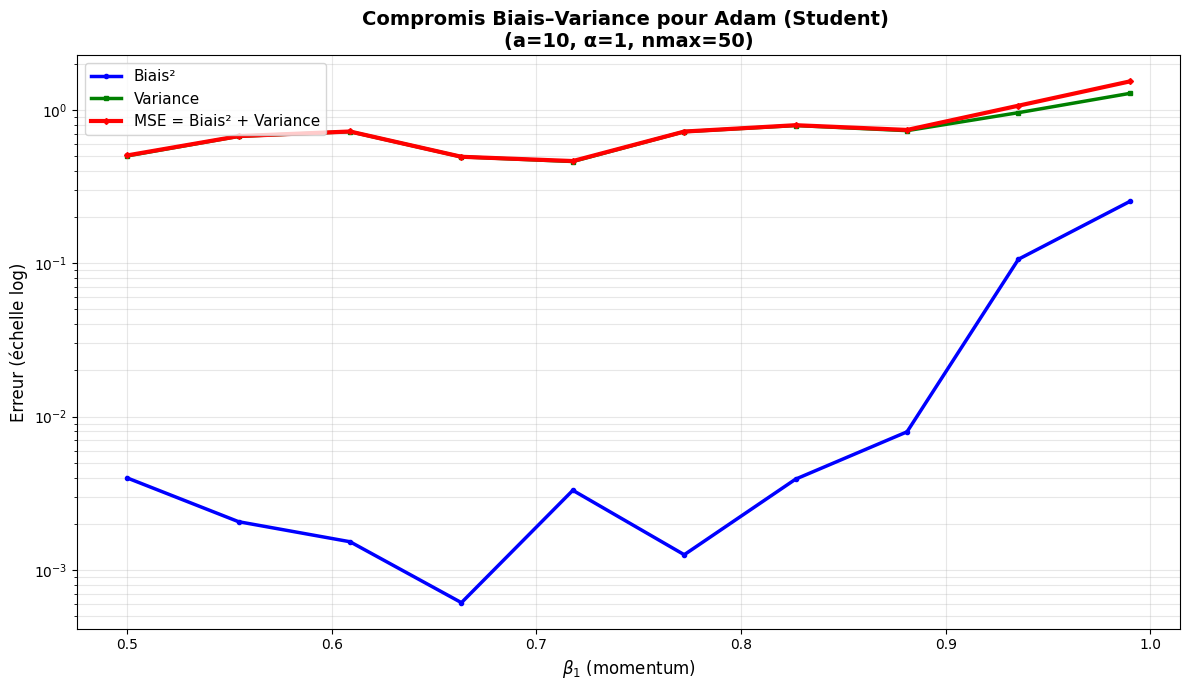

In [26]:
thetainit_bv = np.zeros(d)

# paramètres fixés
a = 10
alpha = 1
beta2_fixed = 0.999

# valeurs de beta1 à tester
beta1s = np.linspace(0.5, 0.99, 10)

Bias_squared, Variance, MSE = AdamForVarying_beta1(
    thetainit=thetainit_bv,
    beta1s=beta1s,
    a=a,
    alpha=alpha,
    mu=mu,
    sigma=sigma,
    df=df,
    G=G_student,
    nmax=50,
    nsimu=200,
    beta2=beta2_fixed
)

fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(beta1s, Bias_squared, color='blue', label='Biais²', linewidth=2.5, marker='o', markersize=3)
ax.plot(beta1s, Variance, color='green', label='Variance', linewidth=2.5, marker='s', markersize=3)
ax.plot(beta1s, MSE, color='red', label='MSE = Biais² + Variance', linewidth=3, marker='D', markersize=3)

ax.set_yscale('log')
ax.set_xlabel(r'$\beta_1$ (momentum)', fontsize=12)
ax.set_ylabel('Erreur (échelle log)', fontsize=12)
ax.set_title('Compromis Biais–Variance pour Adam (Student) \n(a=10, α=1, nmax=50)', 
             fontsize=14, fontweight='bold')

ax.legend(fontsize=11, loc='upper left')
ax.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.show()


Sur cette figure, on observe que la MSE est presque confondue avec le biais², ce qui montre que l’erreur est dominée par un biais résiduel. La variance reste faible pour toutes les valeurs de $\beta_1$ et n’influence que très peu la MSE.

L’effet de $\beta_1$ sur la MSE est donc limité et non monotone. On observe un léger optimum pour des valeurs intermédiaires de $\beta_1$, tandis que des valeurs trop grandes n’apportent pas d’amélioration supplémentaire et peuvent même légèrement dégrader la variance.

Cela s’explique par le fait que le problème est simple et que, même avec un bruit de type Student, Adam est déjà robuste. Le paramètre $\beta_1$ joue ici un rôle de réglage fin plutôt qu’un rôle déterminant.

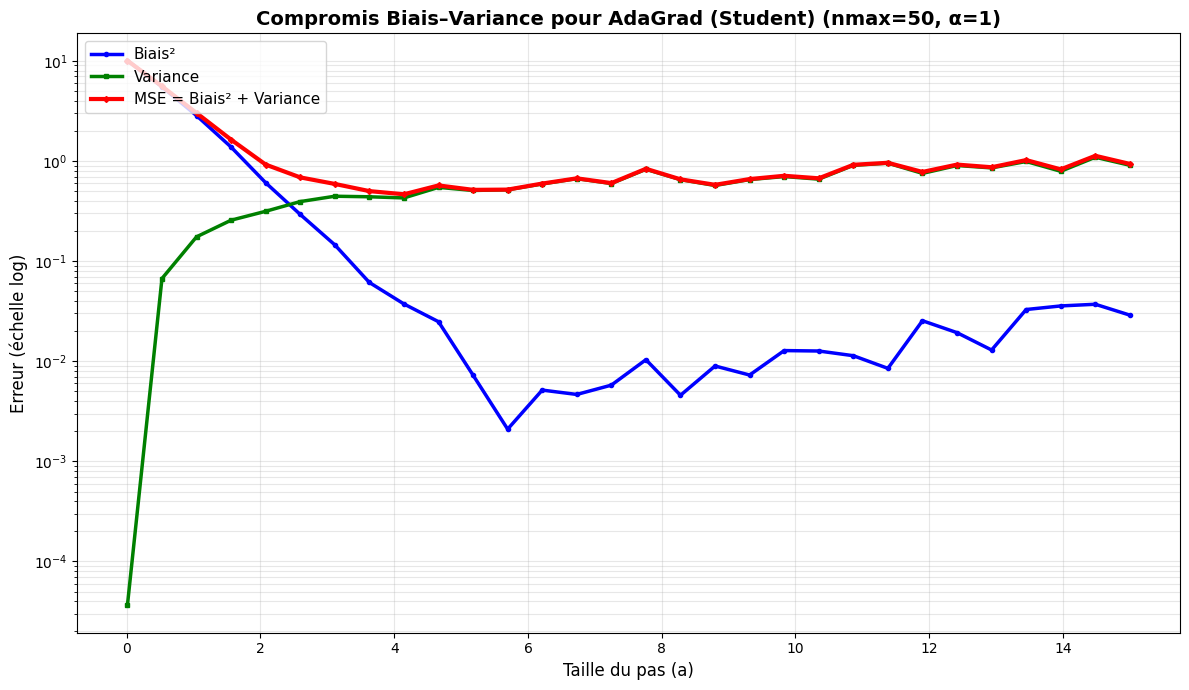

In [27]:
thetainit_bv = np.zeros(d)
Steps = np.linspace(0.01, 15, 30)

Bias_squared, Variance, MSE = AdaGradForVaryingStepSize(
    thetainit=thetainit_bv,
    Steps=Steps,
    alpha=1,
    mu=mu,
    sigma=sigma,
    df=df,
    G=G_student,
    nmax=50,
    nsimu=200
)

fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(Steps, Bias_squared, color='blue', label='Biais²', linewidth=2.5, marker='o', markersize=3)
ax.plot(Steps, Variance, color='green', label='Variance', linewidth=2.5, marker='s', markersize=3)
ax.plot(Steps, MSE, color='red', label='MSE = Biais² + Variance', linewidth=3, marker='D', markersize=3)

ax.set_yscale('log')
ax.set_xlabel('Taille du pas (a)', fontsize=12)
ax.set_ylabel('Erreur (échelle log)', fontsize=12)
ax.set_title('Compromis Biais–Variance pour AdaGrad (Student) (nmax=50, α=1)', fontsize=14, fontweight='bold')
ax.legend(fontsize=11, loc='upper left')
ax.grid(True, alpha=0.3, which='both')
plt.tight_layout()
plt.show()

Ici pour AdaGrad avec la loi de Student on voit que le biais est très grand quand le pas est petit, donc l’algorithme reste loin de la moyenne μ. La variance est presque nulle au début, mais ça ne sert pas vraiment parce que le biais domine complètement. Quand on augmente le pas, le biais diminue petit à petit, donc AdaGrad se rapproche de la solution, mais en même temps la variance augmente à cause des queues lourdes de la loi de Student. Comme AdaGrad accumule les gradients, le pas effectif devient vite très petit, surtout quand il y a des valeurs extrêmes. Du coup l’algorithme devient très prudent, il n’oscille pas beaucoup, mais il n’arrive pas non plus à atteindre exactement μ. La MSE baisse au début puis se stabilise sans minimum très clair. On voit donc qu’AdaGrad est plus stable que Robbins-Monro avec une loi de Student, mais il garde un biais non nul et reste bloqué, ce qui le rend moins performant qu’Adam dans ce cas très bruité.

# Conclusion

Dans ce TP, nous avons étudié différentes méthodes de descente de gradient stochastique pour estimer la moyenne d’une variable aléatoire, d’abord dans le cas d’une loi normale puis dans celui d’une loi de Student. Nous avons vu que le choix du pas joue un rôle central, en particulier pour l’algorithme de Robbins–Monro, où un pas mal choisi peut soit ralentir fortement la convergence, soit augmenter fortement la variance. Ce phénomène est encore plus marqué dans le cas de la loi de Student, en raison des queues lourdes qui génèrent des perturbations importantes dans le gradient.

L’algorithme AdaGrad permet de stabiliser la descente en adaptant automatiquement le pas en fonction des gradients observés. Cette adaptation améliore la robustesse par rapport à Robbins–Monro, mais dans le cas de la loi de Student, la présence fréquente de gradients de grande amplitude conduit à une diminution rapide du pas effectif. L’algorithme devient alors trop conservateur et n’atteint pas complètement la solution, ce qui se traduit par la présence d’un biais résiduel.

L’algorithme Adam combine une adaptation du pas et un terme de momentum. Nos résultats montrent qu’il est globalement plus robuste que Robbins–Monro et AdaGrad, notamment en présence d’un bruit à queues lourdes. Toutefois, l’étude détaillée du paramètre de momentum $\beta_1$ met en évidence que son effet n’est pas monotone. Des valeurs trop faibles rendent l’algorithme trop sensible au bruit, tandis que des valeurs trop élevées introduisent une inertie excessive qui peut empêcher certaines composantes de converger précisément vers la moyenne. On observe ainsi l’existence d’un compromis, avec des valeurs intermédiaires de $\beta_1$ qui donnent les meilleures performances.

Enfin, l’analyse biais–variance montre que, dans ce cadre, l’erreur est largement dominée par le biais, la variance restant relativement faible pour l’ensemble des méthodes étudiées. Adam agit donc principalement en réduisant l’impact du bruit sur la trajectoire, mais sans supprimer totalement le biais pour un nombre fini d’itérations. Ce TP met ainsi en évidence à la fois l’intérêt des méthodes adaptatives et leurs limites, et montre que, même pour un algorithme robuste comme Adam, le choix des hyperparamètres reste important, en particulier en présence de distributions à queues lourdes.